In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from src import ImageQuant2, direcslist, load_image, nb_setup, raw_data_path

nb_setup()
%matplotlib widget

### Data paths

In [2]:
basepath = raw_data_path + "/Imaging/mlc4"
paths = direcslist(basepath, 1)
print(len(paths))

17


### Extract data from paths

In [3]:
dates = []
lines = []
embryo_ids = []
for p in paths:
    code = p.strip("/").split("/")[-2]
    dates.append(code.split("_")[0])
    lines.append(code.split("_")[1])
    # embryo_id = int(os.path.getmtime(glob.glob(p + '/*488 SP 535-50*')[0]))
    # np.savetxt(p + '/EmbryoID.txt', [embryo_id], fmt='%i')
    embryo_ids.append(str(np.loadtxt(p + "/EmbryoID.txt").astype(int)))
print(len(set(embryo_ids)))
df = pd.DataFrame({"Path": paths, "EmbryoID": embryo_ids, "Line": lines, "Date": dates})
df = df[df.Line.isin(["lp637", "nwg240", "nwg338", "nwg376"])]
df["Path"] = df["Path"].apply(lambda x: x[len(raw_data_path) :])
df.to_csv("../../data/mlc4_embryos.csv")
df

17


Path    EmbryoID    Line  \
0   /Imaging/mlc4/220504_nwg376_2205031400mlc4_tom...  1651686192  nwg376   
1   /Imaging/mlc4/220504_nwg376_2205031400mlc4_tom...  1651689529  nwg376   
2   /Imaging/mlc4/220504_nwg376_2205031400mlc4_tom...  1651690158  nwg376   
3   /Imaging/mlc4/220504_nwg376_2205031400mlc4_tom...  1651691673  nwg376   
4   /Imaging/mlc4/220504_nwg376_2205031400mlc4_tom...  1651692142  nwg376   
5   /Imaging/mlc4/220505_lp637_2205041200mlc4_tom4...  1651762677   lp637   
6   /Imaging/mlc4/220505_lp637_2205041200mlc4_tom4...  1651764081   lp637   
7   /Imaging/mlc4/220505_lp637_2205041200mlc4_tom4...  1651763515   lp637   
8   /Imaging/mlc4/220505_lp637_2205041200mlc4_tom4...  1651765815   lp637   
9   /Imaging/mlc4/220505_lp637_2205041200mlc4_tom4...  1651765978   lp637   
10  /Imaging/mlc4/220505_lp637_2205041200mlc4_tom4...  1651766092   lp637   
11  /Imaging/mlc4/220505_lp637_2205041200mlc4_tom4...  1651768045   lp637   
12  /Imaging/mlc4/220505_lp637_2205041200mlc4_tom4...  1651768497   lp637   
13  /Imaging/mlc4/220505_nwg376_2205041000mlc4_tom...  1651758810  nwg376   
14  /Imaging/mlc4/220505_nwg376_2205041000mlc4_tom...  1651759099  nwg376   
15  /Imaging/mlc4/220505_nwg376_2205041000mlc4_tom...  1651761419  nwg376   
16  /Imaging/mlc4/220505_nwg376_2205041000mlc4_tom...  1651761965  nwg376   

      Date  
0   220504  
1   220504  
2   220504  
3   220504  
4   220504  
5   220505  
6   220505  
7   220505  
8   220505  
9   220505  
10  220505  
11  220505  
12  220505  
13  220505  
14  220505  
15  220505  
16  220505

### Segment

In [4]:
# results = []
# for index, row in df.iterrows():
#     print(row.Path)

#     # Import movie
#     img = load_image(row.Path + '/af_corrected.tif')
#     roi = np.loadtxt(row.Path + '/ROI_fit_anaphase.txt')

#     # Run quantification
#     iq = ImageQuant2(img=img, roi=roi)
#     iq.segment()

#     # Save ROIs
#     for i, r in enumerate(iq.roi):
#         np.savetxt(row.Path + '/ROI_fit_%s.txt' % i, r)

### Import quantification model

In [5]:
membg = np.loadtxt("../../data/calibration_mem6.txt")
cytbg = np.loadtxt("../../data/calibration_cyt.txt")
calibration_factor = np.loadtxt("../../data/calibration_constants.txt")[6]
print(calibration_factor)

3.105836925083751


### Loop through embryos and quantify

  0%|                                                                                                                                            | 0/1000 [00:00<?, ?it/s]

  0%|▏                                                                                                                                   | 1/1000 [00:00<09:22,  1.78it/s]

  1%|█▎                                                                                                                                 | 10/1000 [00:00<00:50, 19.56it/s]

  2%|██▌                                                                                                                                | 20/1000 [00:00<00:26, 36.78it/s]

  3%|███▉                                                                                                                               | 30/1000 [00:00<00:19, 50.54it/s]

  4%|█████▏                                                                                                                             | 40/1000 [00:00<00:15, 61.37it/s]

  5%|██████▍                                                                                                                            | 49/1000 [00:01<00:13, 67.96it/s]

  6%|███████▌                                                                                                                           | 58/1000 [00:01<00:12, 73.30it/s]

  7%|████████▊                                                                                                                          | 67/1000 [00:01<00:12, 76.71it/s]

  8%|█████████▉                                                                                                                         | 76/1000 [00:01<00:11, 79.91it/s]

  9%|███████████▎                                                                                                                       | 86/1000 [00:01<00:10, 83.73it/s]

 10%|████████████▌                                                                                                                      | 96/1000 [00:01<00:10, 86.48it/s]

 10%|█████████████▋                                                                                                                    | 105/1000 [00:01<00:10, 85.25it/s]

 12%|██████████████▉                                                                                                                   | 115/1000 [00:01<00:10, 87.11it/s]

 12%|████████████████                                                                                                                  | 124/1000 [00:01<00:10, 86.39it/s]

 13%|█████████████████▎                                                                                                                | 133/1000 [00:02<00:10, 80.68it/s]

 14%|██████████████████▍                                                                                                               | 142/1000 [00:02<00:10, 81.73it/s]

 15%|███████████████████▋                                                                                                              | 151/1000 [00:02<00:10, 83.22it/s]

 16%|████████████████████▊                                                                                                             | 160/1000 [00:02<00:10, 80.75it/s]

 17%|█████████████████████▉                                                                                                            | 169/1000 [00:02<00:10, 82.83it/s]

 18%|███████████████████████▏                                                                                                          | 178/1000 [00:02<00:09, 83.77it/s]

 19%|████████████████████████▎                                                                                                         | 187/1000 [00:02<00:09, 82.93it/s]

 20%|█████████████████████████▌                                                                                                        | 197/1000 [00:02<00:09, 85.45it/s]

 21%|██████████████████████████▉                                                                                                       | 207/1000 [00:02<00:09, 86.99it/s]

 22%|████████████████████████████▏                                                                                                     | 217/1000 [00:03<00:08, 88.43it/s]

 23%|█████████████████████████████▍                                                                                                    | 226/1000 [00:03<00:08, 88.46it/s]

 24%|██████████████████████████████▌                                                                                                   | 235/1000 [00:03<00:08, 88.61it/s]

 24%|███████████████████████████████▊                                                                                                  | 245/1000 [00:03<00:08, 89.84it/s]

 26%|█████████████████████████████████▏                                                                                                | 255/1000 [00:03<00:08, 90.40it/s]

 26%|██████████████████████████████████▍                                                                                               | 265/1000 [00:03<00:08, 91.10it/s]

 28%|███████████████████████████████████▊                                                                                              | 275/1000 [00:03<00:08, 90.46it/s]

 28%|█████████████████████████████████████                                                                                             | 285/1000 [00:03<00:08, 87.88it/s]

 29%|██████████████████████████████████████▏                                                                                           | 294/1000 [00:03<00:08, 87.89it/s]

 30%|███████████████████████████████████████▍                                                                                          | 303/1000 [00:04<00:07, 87.77it/s]

 31%|████████████████████████████████████████▌                                                                                         | 312/1000 [00:04<00:07, 87.11it/s]

 32%|█████████████████████████████████████████▋                                                                                        | 321/1000 [00:04<00:07, 87.72it/s]

 33%|██████████████████████████████████████████▉                                                                                       | 330/1000 [00:04<00:07, 87.29it/s]

 34%|████████████████████████████████████████████                                                                                      | 339/1000 [00:04<00:07, 87.51it/s]

 35%|█████████████████████████████████████████████▏                                                                                    | 348/1000 [00:04<00:07, 87.40it/s]

 36%|██████████████████████████████████████████████▍                                                                                   | 357/1000 [00:04<00:07, 87.08it/s]

 37%|███████████████████████████████████████████████▌                                                                                  | 366/1000 [00:04<00:07, 85.98it/s]

 38%|████████████████████████████████████████████████▊                                                                                 | 375/1000 [00:04<00:07, 85.80it/s]

 38%|█████████████████████████████████████████████████▉                                                                                | 384/1000 [00:04<00:07, 78.70it/s]

 39%|███████████████████████████████████████████████████                                                                               | 393/1000 [00:05<00:07, 81.03it/s]

 40%|████████████████████████████████████████████████████▎                                                                             | 402/1000 [00:05<00:07, 83.05it/s]

 41%|█████████████████████████████████████████████████████▍                                                                            | 411/1000 [00:05<00:07, 82.41it/s]

 42%|██████████████████████████████████████████████████████▌                                                                           | 420/1000 [00:05<00:06, 83.70it/s]

 43%|███████████████████████████████████████████████████████▊                                                                          | 429/1000 [00:05<00:06, 84.93it/s]

 44%|████████████████████████████████████████████████████████▉                                                                         | 438/1000 [00:05<00:07, 77.31it/s]

 45%|██████████████████████████████████████████████████████████                                                                        | 447/1000 [00:05<00:06, 79.95it/s]

 46%|███████████████████████████████████████████████████████████▎                                                                      | 456/1000 [00:05<00:06, 79.78it/s]

 46%|████████████████████████████████████████████████████████████▍                                                                     | 465/1000 [00:05<00:06, 81.54it/s]

 47%|█████████████████████████████████████████████████████████████▌                                                                    | 474/1000 [00:06<00:06, 83.17it/s]

 48%|██████████████████████████████████████████████████████████████▉                                                                   | 484/1000 [00:06<00:06, 85.35it/s]

 49%|████████████████████████████████████████████████████████████████▏                                                                 | 494/1000 [00:06<00:05, 87.36it/s]

 50%|█████████████████████████████████████████████████████████████████▌                                                                | 504/1000 [00:06<00:05, 88.31it/s]

 51%|██████████████████████████████████████████████████████████████████▋                                                               | 513/1000 [00:06<00:05, 88.23it/s]

 52%|███████████████████████████████████████████████████████████████████▊                                                              | 522/1000 [00:06<00:05, 88.20it/s]

 53%|█████████████████████████████████████████████████████████████████████                                                             | 531/1000 [00:06<00:05, 87.77it/s]

 54%|██████████████████████████████████████████████████████████████████████▏                                                           | 540/1000 [00:06<00:05, 87.36it/s]

 55%|███████████████████████████████████████████████████████████████████████▎                                                          | 549/1000 [00:06<00:05, 86.70it/s]

 56%|████████████████████████████████████████████████████████████████████████▌                                                         | 558/1000 [00:07<00:05, 86.61it/s]

 57%|█████████████████████████████████████████████████████████████████████████▋                                                        | 567/1000 [00:07<00:04, 86.93it/s]

 58%|██████████████████████████████████████████████████████████████████████████▉                                                       | 576/1000 [00:07<00:04, 87.22it/s]

 58%|████████████████████████████████████████████████████████████████████████████                                                      | 585/1000 [00:07<00:04, 87.43it/s]

 59%|█████████████████████████████████████████████████████████████████████████████▏                                                    | 594/1000 [00:07<00:04, 87.52it/s]

 60%|██████████████████████████████████████████████████████████████████████████████▍                                                   | 603/1000 [00:07<00:04, 87.74it/s]

 61%|███████████████████████████████████████████████████████████████████████████████▌                                                  | 612/1000 [00:07<00:04, 82.42it/s]

 62%|████████████████████████████████████████████████████████████████████████████████▋                                                 | 621/1000 [00:07<00:04, 81.50it/s]

 63%|█████████████████████████████████████████████████████████████████████████████████▉                                                | 630/1000 [00:07<00:04, 82.29it/s]

 64%|███████████████████████████████████████████████████████████████████████████████████                                               | 639/1000 [00:07<00:04, 82.39it/s]

 65%|████████████████████████████████████████████████████████████████████████████████████▏                                             | 648/1000 [00:08<00:04, 83.25it/s]

 66%|█████████████████████████████████████████████████████████████████████████████████████▍                                            | 657/1000 [00:08<00:04, 84.37it/s]

 67%|██████████████████████████████████████████████████████████████████████████████████████▌                                           | 666/1000 [00:08<00:03, 85.45it/s]

 68%|███████████████████████████████████████████████████████████████████████████████████████▊                                          | 675/1000 [00:08<00:03, 85.97it/s]

 68%|████████████████████████████████████████████████████████████████████████████████████████▉                                         | 684/1000 [00:08<00:03, 86.76it/s]

 69%|██████████████████████████████████████████████████████████████████████████████████████████                                        | 693/1000 [00:08<00:03, 87.15it/s]

 70%|███████████████████████████████████████████████████████████████████████████████████████████▎                                      | 702/1000 [00:08<00:03, 87.66it/s]

 71%|████████████████████████████████████████████████████████████████████████████████████████████▍                                     | 711/1000 [00:08<00:03, 87.70it/s]

 72%|█████████████████████████████████████████████████████████████████████████████████████████████▌                                    | 720/1000 [00:08<00:03, 87.85it/s]

 73%|██████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 729/1000 [00:09<00:03, 87.63it/s]

 74%|███████████████████████████████████████████████████████████████████████████████████████████████▉                                  | 738/1000 [00:09<00:03, 86.92it/s]

 75%|█████████████████████████████████████████████████████████████████████████████████████████████████                                 | 747/1000 [00:09<00:02, 87.25it/s]

 76%|██████████████████████████████████████████████████████████████████████████████████████████████████▎                               | 756/1000 [00:09<00:02, 87.36it/s]

 76%|███████████████████████████████████████████████████████████████████████████████████████████████████▍                              | 765/1000 [00:09<00:02, 87.74it/s]

 77%|████████████████████████████████████████████████████████████████████████████████████████████████████▌                             | 774/1000 [00:09<00:02, 87.47it/s]

 78%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊                            | 783/1000 [00:09<00:02, 86.89it/s]

 79%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉                           | 792/1000 [00:09<00:02, 86.97it/s]

 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏                         | 801/1000 [00:09<00:02, 87.32it/s]

 81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▎                        | 810/1000 [00:09<00:02, 86.10it/s]

 82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍                       | 819/1000 [00:10<00:02, 85.76it/s]

 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 828/1000 [00:10<00:01, 86.33it/s]

 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                     | 837/1000 [00:10<00:01, 87.28it/s]

 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                    | 846/1000 [00:10<00:01, 87.32it/s]

 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                  | 855/1000 [00:10<00:01, 87.84it/s]

 86%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                 | 864/1000 [00:10<00:01, 86.99it/s]

 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                | 873/1000 [00:10<00:01, 87.75it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋               | 882/1000 [00:10<00:01, 87.57it/s]

 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊              | 891/1000 [00:10<00:01, 87.02it/s]

 90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████             | 900/1000 [00:10<00:01, 86.26it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏           | 909/1000 [00:11<00:01, 86.02it/s]

 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎          | 918/1000 [00:11<00:00, 87.11it/s]

 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌         | 927/1000 [00:11<00:00, 87.08it/s]

 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋        | 936/1000 [00:11<00:00, 85.24it/s]

 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊       | 945/1000 [00:11<00:00, 84.76it/s]

 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████      | 954/1000 [00:11<00:00, 85.14it/s]

 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 963/1000 [00:11<00:00, 84.25it/s]

 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 972/1000 [00:11<00:00, 84.64it/s]

 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 981/1000 [00:11<00:00, 84.95it/s]

 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 990/1000 [00:12<00:00, 82.93it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊| 999/1000 [00:12<00:00, 82.43it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 82.08it/s]

  0%|                                                                                                                                            | 0/1000 [00:00<?, ?it/s]

  0%|▏                                                                                                                                   | 1/1000 [00:00<10:10,  1.64it/s]

  1%|█▊                                                                                                                                 | 14/1000 [00:00<00:38, 25.45it/s]

  2%|███▎                                                                                                                               | 25/1000 [00:00<00:22, 42.44it/s]

  4%|████▋                                                                                                                              | 36/1000 [00:00<00:16, 56.90it/s]

  5%|██████                                                                                                                             | 46/1000 [00:01<00:14, 66.38it/s]

  6%|███████▎                                                                                                                           | 56/1000 [00:01<00:12, 74.33it/s]

  7%|████████▋                                                                                                                          | 66/1000 [00:01<00:11, 80.51it/s]

  8%|██████████                                                                                                                         | 77/1000 [00:01<00:10, 88.11it/s]

  9%|███████████▋                                                                                                                       | 89/1000 [00:01<00:09, 96.31it/s]

 10%|█████████████                                                                                                                     | 100/1000 [00:01<00:09, 99.24it/s]

 11%|██████████████▎                                                                                                                  | 111/1000 [00:01<00:08, 101.97it/s]

 12%|███████████████▋                                                                                                                 | 122/1000 [00:01<00:08, 104.24it/s]

 13%|█████████████████▏                                                                                                               | 133/1000 [00:01<00:08, 105.50it/s]

 15%|██████████████████▊                                                                                                              | 146/1000 [00:01<00:07, 110.08it/s]

 16%|████████████████████▌                                                                                                            | 159/1000 [00:02<00:07, 113.74it/s]

 17%|██████████████████████                                                                                                           | 171/1000 [00:02<00:07, 115.52it/s]

 18%|███████████████████████▌                                                                                                         | 183/1000 [00:02<00:07, 115.79it/s]

 20%|█████████████████████████▏                                                                                                       | 195/1000 [00:02<00:07, 110.37it/s]

 21%|██████████████████████████▋                                                                                                      | 207/1000 [00:02<00:07, 111.29it/s]

 22%|████████████████████████████▍                                                                                                    | 220/1000 [00:02<00:06, 114.30it/s]

 23%|██████████████████████████████                                                                                                   | 233/1000 [00:02<00:06, 117.01it/s]

 24%|███████████████████████████████▌                                                                                                 | 245/1000 [00:02<00:06, 116.86it/s]

 26%|█████████████████████████████████▏                                                                                               | 257/1000 [00:02<00:06, 116.89it/s]

 27%|██████████████████████████████████▊                                                                                              | 270/1000 [00:03<00:06, 119.13it/s]

 28%|████████████████████████████████████▌                                                                                            | 283/1000 [00:03<00:05, 120.81it/s]

 30%|██████████████████████████████████████▏                                                                                          | 296/1000 [00:03<00:05, 121.69it/s]

 31%|███████████████████████████████████████▊                                                                                         | 309/1000 [00:03<00:05, 122.58it/s]

 32%|█████████████████████████████████████████▌                                                                                       | 322/1000 [00:03<00:05, 122.11it/s]

 34%|███████████████████████████████████████████▏                                                                                     | 335/1000 [00:03<00:05, 122.34it/s]

 35%|████████████████████████████████████████████▉                                                                                    | 348/1000 [00:03<00:05, 122.25it/s]

 36%|██████████████████████████████████████████████▌                                                                                  | 361/1000 [00:03<00:05, 122.95it/s]

 37%|████████████████████████████████████████████████▏                                                                                | 374/1000 [00:03<00:05, 122.37it/s]

 39%|█████████████████████████████████████████████████▉                                                                               | 387/1000 [00:03<00:04, 122.92it/s]

 40%|███████████████████████████████████████████████████▌                                                                             | 400/1000 [00:04<00:04, 121.93it/s]

 41%|█████████████████████████████████████████████████████▎                                                                           | 413/1000 [00:04<00:04, 122.58it/s]

 43%|██████████████████████████████████████████████████████▉                                                                          | 426/1000 [00:04<00:04, 122.87it/s]

 44%|████████████████████████████████████████████████████████▋                                                                        | 439/1000 [00:04<00:04, 122.95it/s]

 45%|██████████████████████████████████████████████████████████▎                                                                      | 452/1000 [00:04<00:04, 122.27it/s]

 46%|███████████████████████████████████████████████████████████▉                                                                     | 465/1000 [00:04<00:04, 120.90it/s]

 48%|█████████████████████████████████████████████████████████████▋                                                                   | 478/1000 [00:04<00:04, 120.92it/s]

 49%|███████████████████████████████████████████████████████████████▎                                                                 | 491/1000 [00:04<00:04, 121.83it/s]

 50%|█████████████████████████████████████████████████████████████████                                                                | 504/1000 [00:04<00:04, 118.39it/s]

 52%|██████████████████████████████████████████████████████████████████▋                                                              | 517/1000 [00:05<00:04, 119.59it/s]

 53%|████████████████████████████████████████████████████████████████████▎                                                            | 530/1000 [00:05<00:03, 120.24it/s]

 54%|██████████████████████████████████████████████████████████████████████                                                           | 543/1000 [00:05<00:03, 121.75it/s]

 56%|███████████████████████████████████████████████████████████████████████▋                                                         | 556/1000 [00:05<00:03, 121.63it/s]

 57%|█████████████████████████████████████████████████████████████████████████▍                                                       | 569/1000 [00:05<00:03, 122.27it/s]

 58%|███████████████████████████████████████████████████████████████████████████                                                      | 582/1000 [00:05<00:03, 122.98it/s]

 60%|████████████████████████████████████████████████████████████████████████████▊                                                    | 595/1000 [00:05<00:03, 121.74it/s]

 61%|██████████████████████████████████████████████████████████████████████████████▍                                                  | 608/1000 [00:05<00:03, 122.71it/s]

 62%|████████████████████████████████████████████████████████████████████████████████                                                 | 621/1000 [00:05<00:03, 122.25it/s]

 63%|█████████████████████████████████████████████████████████████████████████████████▊                                               | 634/1000 [00:06<00:02, 123.01it/s]

 65%|███████████████████████████████████████████████████████████████████████████████████▍                                             | 647/1000 [00:06<00:02, 122.10it/s]

 66%|█████████████████████████████████████████████████████████████████████████████████████▏                                           | 660/1000 [00:06<00:02, 121.31it/s]

 67%|██████████████████████████████████████████████████████████████████████████████████████▊                                          | 673/1000 [00:06<00:02, 121.19it/s]

 69%|████████████████████████████████████████████████████████████████████████████████████████▍                                        | 686/1000 [00:06<00:02, 121.23it/s]

 70%|██████████████████████████████████████████████████████████████████████████████████████████▏                                      | 699/1000 [00:06<00:02, 120.96it/s]

 71%|███████████████████████████████████████████████████████████████████████████████████████████▊                                     | 712/1000 [00:06<00:02, 121.07it/s]

 72%|█████████████████████████████████████████████████████████████████████████████████████████████▌                                   | 725/1000 [00:06<00:02, 121.30it/s]

 74%|███████████████████████████████████████████████████████████████████████████████████████████████▏                                 | 738/1000 [00:06<00:02, 121.00it/s]

 75%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                | 751/1000 [00:06<00:02, 117.04it/s]

 76%|██████████████████████████████████████████████████████████████████████████████████████████████████▍                              | 763/1000 [00:07<00:02, 104.68it/s]

 78%|███████████████████████████████████████████████████████████████████████████████████████████████████▉                             | 775/1000 [00:07<00:02, 107.48it/s]

 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████▌                           | 787/1000 [00:07<00:01, 110.68it/s]

 80%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏                         | 800/1000 [00:07<00:01, 114.36it/s]

 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████▉                        | 813/1000 [00:07<00:01, 117.15it/s]

 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▌                      | 826/1000 [00:07<00:01, 118.76it/s]

 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                    | 839/1000 [00:07<00:01, 120.31it/s]

 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                   | 852/1000 [00:07<00:01, 118.12it/s]

 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                 | 865/1000 [00:07<00:01, 119.28it/s]

 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎               | 878/1000 [00:08<00:01, 120.62it/s]

 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉              | 891/1000 [00:08<00:00, 121.10it/s]

 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌            | 904/1000 [00:08<00:00, 121.97it/s]

 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎          | 917/1000 [00:08<00:00, 122.18it/s]

 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉         | 930/1000 [00:08<00:00, 122.57it/s]

 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋       | 943/1000 [00:08<00:00, 122.78it/s]

 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 956/1000 [00:08<00:00, 123.12it/s]

 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████    | 969/1000 [00:08<00:00, 124.22it/s]

 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋  | 982/1000 [00:08<00:00, 124.40it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 995/1000 [00:09<00:00, 121.11it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 110.09it/s]

  0%|                                                                                                                                            | 0/1000 [00:00<?, ?it/s]

  0%|▏                                                                                                                                   | 1/1000 [00:00<07:45,  2.15it/s]

  2%|██▌                                                                                                                                | 20/1000 [00:00<00:21, 45.79it/s]

  4%|████▋                                                                                                                              | 36/1000 [00:00<00:13, 74.14it/s]

  6%|███████▏                                                                                                                          | 55/1000 [00:00<00:09, 103.35it/s]

  7%|█████████▏                                                                                                                        | 71/1000 [00:00<00:08, 115.60it/s]

  9%|███████████▍                                                                                                                      | 88/1000 [00:00<00:07, 129.71it/s]

 11%|█████████████▊                                                                                                                   | 107/1000 [00:01<00:06, 145.19it/s]

 13%|████████████████▎                                                                                                                | 126/1000 [00:01<00:05, 157.01it/s]

 14%|██████████████████▌                                                                                                              | 144/1000 [00:01<00:05, 162.37it/s]

 16%|█████████████████████                                                                                                            | 163/1000 [00:01<00:04, 168.18it/s]

 18%|███████████████████████▎                                                                                                         | 181/1000 [00:01<00:04, 169.75it/s]

 20%|█████████████████████████▋                                                                                                       | 199/1000 [00:01<00:04, 169.86it/s]

 22%|███████████████████████████▉                                                                                                     | 217/1000 [00:01<00:04, 166.93it/s]

 23%|██████████████████████████████▏                                                                                                  | 234/1000 [00:01<00:04, 165.66it/s]

 25%|████████████████████████████████▍                                                                                                | 251/1000 [00:01<00:04, 165.30it/s]

 27%|██████████████████████████████████▊                                                                                              | 270/1000 [00:02<00:04, 169.64it/s]

 29%|█████████████████████████████████████▏                                                                                           | 288/1000 [00:02<00:04, 166.44it/s]

 30%|███████████████████████████████████████▎                                                                                         | 305/1000 [00:02<00:04, 165.27it/s]

 32%|█████████████████████████████████████████▌                                                                                       | 322/1000 [00:02<00:04, 166.48it/s]

 34%|███████████████████████████████████████████▉                                                                                     | 341/1000 [00:02<00:03, 170.69it/s]

 36%|██████████████████████████████████████████████▎                                                                                  | 359/1000 [00:02<00:03, 171.08it/s]

 38%|████████████████████████████████████████████████▊                                                                                | 378/1000 [00:02<00:03, 174.89it/s]

 40%|███████████████████████████████████████████████████▏                                                                             | 397/1000 [00:02<00:03, 177.98it/s]

 42%|█████████████████████████████████████████████████████▋                                                                           | 416/1000 [00:02<00:03, 179.84it/s]

 44%|████████████████████████████████████████████████████████                                                                         | 435/1000 [00:02<00:03, 180.34it/s]

 45%|██████████████████████████████████████████████████████████▌                                                                      | 454/1000 [00:03<00:03, 179.33it/s]

 47%|████████████████████████████████████████████████████████████▉                                                                    | 472/1000 [00:03<00:02, 176.22it/s]

 49%|███████████████████████████████████████████████████████████████▎                                                                 | 491/1000 [00:03<00:02, 178.15it/s]

 51%|█████████████████████████████████████████████████████████████████▊                                                               | 510/1000 [00:03<00:02, 179.86it/s]

 53%|████████████████████████████████████████████████████████████████████                                                             | 528/1000 [00:03<00:02, 178.38it/s]

 55%|██████████████████████████████████████████████████████████████████████▍                                                          | 546/1000 [00:03<00:02, 178.25it/s]

 56%|████████████████████████████████████████████████████████████████████████▊                                                        | 564/1000 [00:03<00:02, 177.10it/s]

 58%|███████████████████████████████████████████████████████████████████████████                                                      | 582/1000 [00:03<00:02, 173.47it/s]

 60%|█████████████████████████████████████████████████████████████████████████████▍                                                   | 600/1000 [00:03<00:02, 174.15it/s]

 62%|███████████████████████████████████████████████████████████████████████████████▋                                                 | 618/1000 [00:04<00:02, 175.03it/s]

 64%|██████████████████████████████████████████████████████████████████████████████████▏                                              | 637/1000 [00:04<00:02, 177.40it/s]

 66%|████████████████████████████████████████████████████████████████████████████████████▍                                            | 655/1000 [00:04<00:01, 178.15it/s]

 67%|██████████████████████████████████████████████████████████████████████████████████████▉                                          | 674/1000 [00:04<00:01, 181.23it/s]

 69%|█████████████████████████████████████████████████████████████████████████████████████████▍                                       | 693/1000 [00:04<00:01, 181.26it/s]

 71%|███████████████████████████████████████████████████████████████████████████████████████████▊                                     | 712/1000 [00:04<00:01, 181.90it/s]

 73%|██████████████████████████████████████████████████████████████████████████████████████████████▎                                  | 731/1000 [00:04<00:01, 180.92it/s]

 75%|████████████████████████████████████████████████████████████████████████████████████████████████▊                                | 750/1000 [00:04<00:01, 181.97it/s]

 77%|███████████████████████████████████████████████████████████████████████████████████████████████████▏                             | 769/1000 [00:04<00:01, 181.85it/s]

 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋                           | 788/1000 [00:04<00:01, 182.05it/s]

 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████                         | 807/1000 [00:05<00:01, 182.46it/s]

 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▌                      | 826/1000 [00:05<00:00, 180.51it/s]

 84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████                    | 845/1000 [00:05<00:00, 179.64it/s]

 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 864/1000 [00:05<00:00, 180.57it/s]

 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉               | 883/1000 [00:05<00:00, 179.53it/s]

 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏            | 901/1000 [00:05<00:00, 179.11it/s]

 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌          | 919/1000 [00:05<00:00, 178.87it/s]

 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊        | 937/1000 [00:05<00:00, 174.95it/s]

 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏     | 955/1000 [00:05<00:00, 172.57it/s]

 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋   | 974/1000 [00:06<00:00, 175.52it/s]

 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████ | 993/1000 [00:06<00:00, 177.83it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 162.78it/s]

  0%|                                                                                                                                            | 0/1000 [00:00<?, ?it/s]

  0%|▏                                                                                                                                   | 1/1000 [00:00<06:01,  2.76it/s]

  2%|██▍                                                                                                                                | 19/1000 [00:00<00:18, 52.90it/s]

  4%|████▉                                                                                                                              | 38/1000 [00:00<00:10, 91.49it/s]

  6%|███████▎                                                                                                                          | 56/1000 [00:00<00:08, 116.61it/s]

  7%|█████████▌                                                                                                                        | 74/1000 [00:00<00:06, 133.76it/s]

  9%|████████████                                                                                                                      | 93/1000 [00:00<00:06, 147.46it/s]

 11%|██████████████▎                                                                                                                  | 111/1000 [00:00<00:05, 156.14it/s]

 13%|████████████████▋                                                                                                                | 129/1000 [00:01<00:05, 162.91it/s]

 15%|███████████████████                                                                                                              | 148/1000 [00:01<00:05, 169.90it/s]

 17%|█████████████████████▌                                                                                                           | 167/1000 [00:01<00:04, 174.20it/s]

 19%|███████████████████████▉                                                                                                         | 186/1000 [00:01<00:04, 176.70it/s]

 20%|██████████████████████████▍                                                                                                      | 205/1000 [00:01<00:04, 179.55it/s]

 22%|████████████████████████████▉                                                                                                    | 224/1000 [00:01<00:04, 178.26it/s]

 24%|███████████████████████████████▎                                                                                                 | 243/1000 [00:01<00:04, 179.32it/s]

 26%|█████████████████████████████████▊                                                                                               | 262/1000 [00:01<00:04, 180.47it/s]

 28%|████████████████████████████████████▏                                                                                            | 281/1000 [00:01<00:03, 182.28it/s]

 30%|██████████████████████████████████████▋                                                                                          | 300/1000 [00:02<00:03, 179.79it/s]

 32%|█████████████████████████████████████████▏                                                                                       | 319/1000 [00:02<00:03, 172.62it/s]

 34%|███████████████████████████████████████████▌                                                                                     | 338/1000 [00:02<00:03, 174.92it/s]

 36%|██████████████████████████████████████████████                                                                                   | 357/1000 [00:02<00:03, 177.19it/s]

 38%|████████████████████████████████████████████████▌                                                                                | 376/1000 [00:02<00:03, 179.43it/s]

 40%|██████████████████████████████████████████████████▉                                                                              | 395/1000 [00:02<00:03, 180.33it/s]

 41%|█████████████████████████████████████████████████████▍                                                                           | 414/1000 [00:02<00:03, 182.05it/s]

 43%|███████████████████████████████████████████████████████▊                                                                         | 433/1000 [00:02<00:03, 183.21it/s]

 45%|██████████████████████████████████████████████████████████▎                                                                      | 452/1000 [00:02<00:03, 182.38it/s]

 47%|████████████████████████████████████████████████████████████▊                                                                    | 471/1000 [00:02<00:02, 181.72it/s]

 49%|███████████████████████████████████████████████████████████████▏                                                                 | 490/1000 [00:03<00:02, 180.18it/s]

 51%|█████████████████████████████████████████████████████████████████▋                                                               | 509/1000 [00:03<00:02, 168.88it/s]

 53%|███████████████████████████████████████████████████████████████████▉                                                             | 527/1000 [00:03<00:02, 170.74it/s]

 55%|██████████████████████████████████████████████████████████████████████▎                                                          | 545/1000 [00:03<00:02, 172.60it/s]

 56%|████████████████████████████████████████████████████████████████████████▊                                                        | 564/1000 [00:03<00:02, 177.14it/s]

 58%|███████████████████████████████████████████████████████████████████████████                                                      | 582/1000 [00:03<00:02, 176.99it/s]

 60%|█████████████████████████████████████████████████████████████████████████████▌                                                   | 601/1000 [00:03<00:02, 179.09it/s]

 62%|███████████████████████████████████████████████████████████████████████████████▉                                                 | 620/1000 [00:03<00:02, 181.24it/s]

 64%|██████████████████████████████████████████████████████████████████████████████████▍                                              | 639/1000 [00:03<00:01, 182.05it/s]

 66%|████████████████████████████████████████████████████████████████████████████████████▉                                            | 658/1000 [00:04<00:01, 182.45it/s]

 68%|███████████████████████████████████████████████████████████████████████████████████████▎                                         | 677/1000 [00:04<00:01, 178.42it/s]

 70%|█████████████████████████████████████████████████████████████████████████████████████████▋                                       | 695/1000 [00:04<00:01, 173.72it/s]

 71%|███████████████████████████████████████████████████████████████████████████████████████████▉                                     | 713/1000 [00:04<00:01, 175.30it/s]

 73%|██████████████████████████████████████████████████████████████████████████████████████████████▍                                  | 732/1000 [00:04<00:01, 176.95it/s]

 75%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                | 751/1000 [00:04<00:01, 178.73it/s]

 77%|███████████████████████████████████████████████████████████████████████████████████████████████████▎                             | 770/1000 [00:04<00:01, 181.14it/s]

 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊                           | 789/1000 [00:04<00:01, 182.02it/s]

 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏                        | 808/1000 [00:04<00:01, 183.64it/s]

 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 827/1000 [00:04<00:00, 184.14it/s]

 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                   | 846/1000 [00:05<00:00, 184.19it/s]

 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                 | 865/1000 [00:05<00:00, 184.28it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████               | 884/1000 [00:05<00:00, 182.74it/s]

 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍            | 903/1000 [00:05<00:00, 183.56it/s]

 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉          | 922/1000 [00:05<00:00, 184.16it/s]

 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍       | 941/1000 [00:05<00:00, 183.06it/s]

 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 960/1000 [00:05<00:00, 182.22it/s]

 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 979/1000 [00:05<00:00, 182.14it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋| 998/1000 [00:05<00:00, 182.55it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 169.15it/s]

  0%|                                                                                                                                            | 0/1000 [00:00<?, ?it/s]

  0%|▏                                                                                                                                   | 1/1000 [00:00<08:16,  2.01it/s]

  2%|█▉                                                                                                                                 | 15/1000 [00:00<00:30, 32.81it/s]

  3%|███▉                                                                                                                               | 30/1000 [00:00<00:16, 60.28it/s]

  4%|█████▊                                                                                                                             | 44/1000 [00:00<00:11, 80.49it/s]

  6%|███████▋                                                                                                                           | 59/1000 [00:00<00:09, 97.62it/s]

  7%|█████████▌                                                                                                                        | 74/1000 [00:01<00:08, 110.98it/s]

  9%|███████████▌                                                                                                                      | 89/1000 [00:01<00:07, 120.79it/s]

 10%|█████████████▍                                                                                                                   | 104/1000 [00:01<00:07, 127.62it/s]

 12%|███████████████▎                                                                                                                 | 119/1000 [00:01<00:06, 131.03it/s]

 13%|█████████████████▏                                                                                                               | 133/1000 [00:01<00:06, 131.53it/s]

 15%|███████████████████                                                                                                              | 148/1000 [00:01<00:06, 136.62it/s]

 16%|█████████████████████                                                                                                            | 163/1000 [00:01<00:06, 135.89it/s]

 18%|██████████████████████▉                                                                                                          | 178/1000 [00:01<00:05, 138.68it/s]

 19%|████████████████████████▉                                                                                                        | 193/1000 [00:01<00:05, 141.32it/s]

 21%|██████████████████████████▊                                                                                                      | 208/1000 [00:01<00:05, 140.20it/s]

 22%|████████████████████████████▊                                                                                                    | 223/1000 [00:02<00:05, 141.48it/s]

 24%|██████████████████████████████▋                                                                                                  | 238/1000 [00:02<00:05, 143.19it/s]

 25%|████████████████████████████████▋                                                                                                | 253/1000 [00:02<00:05, 143.91it/s]

 27%|██████████████████████████████████▌                                                                                              | 268/1000 [00:02<00:05, 143.92it/s]

 28%|████████████████████████████████████▌                                                                                            | 283/1000 [00:02<00:04, 143.80it/s]

 30%|██████████████████████████████████████▍                                                                                          | 298/1000 [00:02<00:04, 142.45it/s]

 31%|████████████████████████████████████████▍                                                                                        | 313/1000 [00:02<00:04, 141.33it/s]

 33%|██████████████████████████████████████████▎                                                                                      | 328/1000 [00:02<00:04, 140.37it/s]

 34%|████████████████████████████████████████████▏                                                                                    | 343/1000 [00:02<00:04, 139.70it/s]

 36%|██████████████████████████████████████████████                                                                                   | 357/1000 [00:03<00:04, 138.84it/s]

 37%|███████████████████████████████████████████████▊                                                                                 | 371/1000 [00:03<00:04, 138.36it/s]

 39%|█████████████████████████████████████████████████▊                                                                               | 386/1000 [00:03<00:04, 140.34it/s]

 40%|███████████████████████████████████████████████████▋                                                                             | 401/1000 [00:03<00:04, 139.17it/s]

 42%|█████████████████████████████████████████████████████▌                                                                           | 415/1000 [00:03<00:04, 135.38it/s]

 43%|███████████████████████████████████████████████████████▍                                                                         | 430/1000 [00:03<00:04, 138.13it/s]

 44%|█████████████████████████████████████████████████████████▍                                                                       | 445/1000 [00:03<00:03, 139.62it/s]

 46%|███████████████████████████████████████████████████████████▎                                                                     | 460/1000 [00:03<00:03, 139.81it/s]

 47%|█████████████████████████████████████████████████████████████▏                                                                   | 474/1000 [00:03<00:03, 139.30it/s]

 49%|██████████████████████████████████████████████████████████████▉                                                                  | 488/1000 [00:03<00:03, 139.40it/s]

 50%|████████████████████████████████████████████████████████████████▉                                                                | 503/1000 [00:04<00:03, 140.45it/s]

 52%|██████████████████████████████████████████████████████████████████▊                                                              | 518/1000 [00:04<00:03, 141.45it/s]

 53%|████████████████████████████████████████████████████████████████████▊                                                            | 533/1000 [00:04<00:03, 142.26it/s]

 55%|██████████████████████████████████████████████████████████████████████▋                                                          | 548/1000 [00:04<00:03, 143.24it/s]

 56%|████████████████████████████████████████████████████████████████████████▋                                                        | 563/1000 [00:04<00:03, 143.48it/s]

 58%|██████████████████████████████████████████████████████████████████████████▌                                                      | 578/1000 [00:04<00:02, 144.46it/s]

 59%|████████████████████████████████████████████████████████████████████████████▍                                                    | 593/1000 [00:04<00:02, 144.82it/s]

 61%|██████████████████████████████████████████████████████████████████████████████▍                                                  | 608/1000 [00:04<00:02, 145.58it/s]

 62%|████████████████████████████████████████████████████████████████████████████████▎                                                | 623/1000 [00:04<00:02, 145.55it/s]

 64%|██████████████████████████████████████████████████████████████████████████████████▎                                              | 638/1000 [00:04<00:02, 144.91it/s]

 65%|████████████████████████████████████████████████████████████████████████████████████▏                                            | 653/1000 [00:05<00:02, 143.78it/s]

 67%|██████████████████████████████████████████████████████████████████████████████████████▏                                          | 668/1000 [00:05<00:02, 142.58it/s]

 68%|████████████████████████████████████████████████████████████████████████████████████████                                         | 683/1000 [00:05<00:02, 141.28it/s]

 70%|██████████████████████████████████████████████████████████████████████████████████████████                                       | 698/1000 [00:05<00:02, 142.05it/s]

 71%|███████████████████████████████████████████████████████████████████████████████████████████▉                                     | 713/1000 [00:05<00:02, 136.31it/s]

 73%|█████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 727/1000 [00:05<00:01, 137.31it/s]

 74%|███████████████████████████████████████████████████████████████████████████████████████████████▌                                 | 741/1000 [00:05<00:01, 136.47it/s]

 76%|█████████████████████████████████████████████████████████████████████████████████████████████████▍                               | 755/1000 [00:05<00:01, 137.28it/s]

 77%|███████████████████████████████████████████████████████████████████████████████████████████████████▏                             | 769/1000 [00:05<00:01, 137.28it/s]

 78%|█████████████████████████████████████████████████████████████████████████████████████████████████████                            | 783/1000 [00:06<00:01, 134.10it/s]

 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████▊                          | 797/1000 [00:06<00:01, 130.63it/s]

 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌                        | 811/1000 [00:06<00:01, 130.49it/s]

 82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍                      | 825/1000 [00:06<00:01, 126.86it/s]

 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                    | 839/1000 [00:06<00:01, 128.02it/s]

 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                   | 852/1000 [00:06<00:01, 127.92it/s]

 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                 | 866/1000 [00:06<00:01, 131.18it/s]

 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌               | 880/1000 [00:06<00:00, 133.34it/s]

 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍             | 895/1000 [00:06<00:00, 136.43it/s]

 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎           | 909/1000 [00:07<00:00, 137.28it/s]

 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏         | 924/1000 [00:07<00:00, 139.40it/s]

 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏       | 939/1000 [00:07<00:00, 139.85it/s]

 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████      | 954/1000 [00:07<00:00, 140.41it/s]

 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████    | 969/1000 [00:07<00:00, 138.22it/s]

 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 983/1000 [00:07<00:00, 137.00it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌| 997/1000 [00:07<00:00, 134.98it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 130.40it/s]

  0%|                                                                                                                                            | 0/1000 [00:00<?, ?it/s]

  0%|▏                                                                                                                                   | 1/1000 [00:00<08:18,  2.01it/s]

  2%|█▉                                                                                                                                 | 15/1000 [00:00<00:30, 32.39it/s]

  2%|███                                                                                                                                | 23/1000 [00:00<00:26, 37.09it/s]

  4%|████▉                                                                                                                              | 38/1000 [00:00<00:15, 61.69it/s]

  5%|██████▉                                                                                                                            | 53/1000 [00:00<00:11, 81.76it/s]

  7%|████████▊                                                                                                                          | 67/1000 [00:01<00:09, 95.15it/s]

  8%|██████████▌                                                                                                                       | 81/1000 [00:01<00:08, 106.04it/s]

 10%|████████████▎                                                                                                                     | 95/1000 [00:01<00:07, 113.65it/s]

 11%|██████████████▏                                                                                                                  | 110/1000 [00:01<00:07, 121.83it/s]

 12%|████████████████▏                                                                                                                | 125/1000 [00:01<00:06, 128.88it/s]

 14%|█████████████████▉                                                                                                               | 139/1000 [00:01<00:06, 128.93it/s]

 15%|███████████████████▋                                                                                                             | 153/1000 [00:01<00:06, 123.46it/s]

 17%|█████████████████████▌                                                                                                           | 167/1000 [00:01<00:06, 127.61it/s]

 18%|███████████████████████▎                                                                                                         | 181/1000 [00:01<00:06, 129.48it/s]

 20%|█████████████████████████▏                                                                                                       | 195/1000 [00:02<00:06, 132.18it/s]

 21%|██████████████████████████▉                                                                                                      | 209/1000 [00:02<00:05, 132.67it/s]

 22%|████████████████████████████▊                                                                                                    | 223/1000 [00:02<00:05, 134.11it/s]

 24%|██████████████████████████████▌                                                                                                  | 237/1000 [00:02<00:05, 133.57it/s]

 25%|████████████████████████████████▌                                                                                                | 252/1000 [00:02<00:05, 135.84it/s]

 27%|██████████████████████████████████▎                                                                                              | 266/1000 [00:02<00:05, 129.83it/s]

 28%|████████████████████████████████████                                                                                             | 280/1000 [00:02<00:05, 131.14it/s]

 29%|█████████████████████████████████████▉                                                                                           | 294/1000 [00:02<00:05, 132.26it/s]

 31%|███████████████████████████████████████▊                                                                                         | 309/1000 [00:02<00:05, 135.78it/s]

 32%|█████████████████████████████████████████▋                                                                                       | 323/1000 [00:03<00:05, 134.95it/s]

 34%|███████████████████████████████████████████▌                                                                                     | 338/1000 [00:03<00:04, 137.40it/s]

 35%|█████████████████████████████████████████████▍                                                                                   | 352/1000 [00:03<00:04, 135.55it/s]

 37%|███████████████████████████████████████████████▏                                                                                 | 366/1000 [00:03<00:04, 134.88it/s]

 38%|█████████████████████████████████████████████████                                                                                | 380/1000 [00:03<00:04, 135.71it/s]

 40%|██████████████████████████████████████████████████▉                                                                              | 395/1000 [00:03<00:04, 138.24it/s]

 41%|████████████████████████████████████████████████████▊                                                                            | 409/1000 [00:03<00:04, 138.15it/s]

 42%|██████████████████████████████████████████████████████▌                                                                          | 423/1000 [00:03<00:04, 137.02it/s]

 44%|████████████████████████████████████████████████████████▎                                                                        | 437/1000 [00:03<00:04, 137.50it/s]

 45%|██████████████████████████████████████████████████████████▏                                                                      | 451/1000 [00:03<00:03, 137.87it/s]

 46%|███████████████████████████████████████████████████████████▉                                                                     | 465/1000 [00:04<00:03, 137.56it/s]

 48%|█████████████████████████████████████████████████████████████▊                                                                   | 479/1000 [00:04<00:03, 136.71it/s]

 49%|███████████████████████████████████████████████████████████████▌                                                                 | 493/1000 [00:04<00:03, 136.52it/s]

 51%|█████████████████████████████████████████████████████████████████▍                                                               | 507/1000 [00:04<00:03, 134.16it/s]

 52%|███████████████████████████████████████████████████████████████████▏                                                             | 521/1000 [00:04<00:03, 131.93it/s]

 54%|█████████████████████████████████████████████████████████████████████                                                            | 535/1000 [00:04<00:03, 133.30it/s]

 55%|██████████████████████████████████████████████████████████████████████▊                                                          | 549/1000 [00:04<00:03, 128.53it/s]

 56%|████████████████████████████████████████████████████████████████████████▋                                                        | 563/1000 [00:04<00:03, 130.76it/s]

 58%|██████████████████████████████████████████████████████████████████████████▍                                                      | 577/1000 [00:04<00:03, 129.83it/s]

 59%|████████████████████████████████████████████████████████████████████████████▏                                                    | 591/1000 [00:05<00:03, 130.20it/s]

 60%|██████████████████████████████████████████████████████████████████████████████                                                   | 605/1000 [00:05<00:03, 131.52it/s]

 62%|███████████████████████████████████████████████████████████████████████████████▊                                                 | 619/1000 [00:05<00:02, 130.53it/s]

 63%|█████████████████████████████████████████████████████████████████████████████████▋                                               | 633/1000 [00:05<00:02, 126.12it/s]

 65%|███████████████████████████████████████████████████████████████████████████████████▎                                             | 646/1000 [00:05<00:02, 126.26it/s]

 66%|█████████████████████████████████████████████████████████████████████████████████████                                            | 659/1000 [00:05<00:02, 125.12it/s]

 67%|██████████████████████████████████████████████████████████████████████████████████████▋                                          | 672/1000 [00:05<00:02, 126.43it/s]

 68%|████████████████████████████████████████████████████████████████████████████████████████▎                                        | 685/1000 [00:05<00:02, 125.76it/s]

 70%|██████████████████████████████████████████████████████████████████████████████████████████                                       | 698/1000 [00:05<00:02, 125.70it/s]

 71%|███████████████████████████████████████████████████████████████████████████████████████████▋                                     | 711/1000 [00:05<00:02, 126.46it/s]

 72%|█████████████████████████████████████████████████████████████████████████████████████████████▍                                   | 724/1000 [00:06<00:02, 126.52it/s]

 74%|███████████████████████████████████████████████████████████████████████████████████████████████▏                                 | 738/1000 [00:06<00:02, 129.46it/s]

 75%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                | 751/1000 [00:06<00:01, 129.15it/s]

 76%|██████████████████████████████████████████████████████████████████████████████████████████████████▌                              | 764/1000 [00:06<00:01, 127.46it/s]

 78%|████████████████████████████████████████████████████████████████████████████████████████████████████▏                            | 777/1000 [00:06<00:01, 121.54it/s]

 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉                           | 790/1000 [00:06<00:01, 120.27it/s]

 80%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌                         | 803/1000 [00:06<00:01, 113.53it/s]

 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏                       | 815/1000 [00:06<00:01, 114.49it/s]

 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▊                      | 828/1000 [00:06<00:01, 116.77it/s]

 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                    | 841/1000 [00:07<00:01, 117.32it/s]

 85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████                   | 853/1000 [00:07<00:01, 115.56it/s]

 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                 | 866/1000 [00:07<00:01, 119.37it/s]

 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎               | 878/1000 [00:07<00:01, 118.37it/s]

 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏             | 893/1000 [00:07<00:00, 126.21it/s]

 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏           | 908/1000 [00:07<00:00, 130.54it/s]

 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉          | 922/1000 [00:07<00:00, 132.88it/s]

 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋        | 936/1000 [00:07<00:00, 134.19it/s]

 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋      | 951/1000 [00:07<00:00, 136.71it/s]

 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 965/1000 [00:07<00:00, 137.37it/s]

 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 979/1000 [00:08<00:00, 137.48it/s]

 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████ | 993/1000 [00:08<00:00, 137.23it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 121.46it/s]

  0%|                                                                                                                                            | 0/1000 [00:00<?, ?it/s]

  0%|▏                                                                                                                                   | 1/1000 [00:00<08:49,  1.89it/s]

  1%|█▏                                                                                                                                  | 9/1000 [00:00<00:53, 18.41it/s]

  2%|██▎                                                                                                                                | 18/1000 [00:00<00:28, 34.05it/s]

  3%|███▍                                                                                                                               | 26/1000 [00:00<00:21, 44.69it/s]

  4%|████▌                                                                                                                              | 35/1000 [00:00<00:17, 54.71it/s]

  4%|█████▋                                                                                                                             | 43/1000 [00:01<00:15, 61.06it/s]

  5%|██████▋                                                                                                                            | 51/1000 [00:01<00:14, 65.65it/s]

  6%|███████▊                                                                                                                           | 60/1000 [00:01<00:13, 71.33it/s]

  7%|████████▉                                                                                                                          | 68/1000 [00:01<00:12, 72.75it/s]

  8%|██████████                                                                                                                         | 77/1000 [00:01<00:12, 75.27it/s]

  9%|███████████▎                                                                                                                       | 86/1000 [00:01<00:11, 77.61it/s]

 10%|████████████▍                                                                                                                      | 95/1000 [00:01<00:11, 79.52it/s]

 10%|█████████████▌                                                                                                                    | 104/1000 [00:01<00:11, 78.26it/s]

 11%|██████████████▋                                                                                                                   | 113/1000 [00:01<00:11, 79.38it/s]

 12%|███████████████▊                                                                                                                  | 122/1000 [00:02<00:10, 81.15it/s]

 13%|█████████████████                                                                                                                 | 131/1000 [00:02<00:10, 81.16it/s]

 14%|██████████████████▏                                                                                                               | 140/1000 [00:02<00:10, 81.96it/s]

 15%|███████████████████▎                                                                                                              | 149/1000 [00:02<00:10, 82.06it/s]

 16%|████████████████████▌                                                                                                             | 158/1000 [00:02<00:10, 79.04it/s]

 17%|█████████████████████▌                                                                                                            | 166/1000 [00:02<00:10, 78.23it/s]

 17%|██████████████████████▌                                                                                                           | 174/1000 [00:02<00:10, 77.84it/s]

 18%|███████████████████████▋                                                                                                          | 182/1000 [00:02<00:10, 78.22it/s]

 19%|████████████████████████▋                                                                                                         | 190/1000 [00:02<00:10, 77.55it/s]

 20%|█████████████████████████▋                                                                                                        | 198/1000 [00:03<00:10, 77.23it/s]

 21%|██████████████████████████▊                                                                                                       | 206/1000 [00:03<00:10, 77.24it/s]

 21%|███████████████████████████▊                                                                                                      | 214/1000 [00:03<00:10, 77.21it/s]

 22%|████████████████████████████▊                                                                                                     | 222/1000 [00:03<00:10, 77.37it/s]

 23%|█████████████████████████████▉                                                                                                    | 230/1000 [00:03<00:09, 77.61it/s]

 24%|██████████████████████████████▉                                                                                                   | 238/1000 [00:03<00:09, 78.12it/s]

 25%|███████████████████████████████▉                                                                                                  | 246/1000 [00:03<00:09, 78.60it/s]

 26%|█████████████████████████████████▏                                                                                                | 255/1000 [00:03<00:09, 80.81it/s]

 26%|██████████████████████████████████▎                                                                                               | 264/1000 [00:03<00:09, 79.11it/s]

 27%|███████████████████████████████████▍                                                                                              | 273/1000 [00:03<00:09, 80.26it/s]

 28%|████████████████████████████████████▋                                                                                             | 282/1000 [00:04<00:08, 81.23it/s]

 29%|█████████████████████████████████████▊                                                                                            | 291/1000 [00:04<00:08, 81.78it/s]

 30%|███████████████████████████████████████                                                                                           | 300/1000 [00:04<00:08, 82.30it/s]

 31%|████████████████████████████████████████▏                                                                                         | 309/1000 [00:04<00:08, 81.79it/s]

 32%|█████████████████████████████████████████▎                                                                                        | 318/1000 [00:04<00:08, 83.14it/s]

 33%|██████████████████████████████████████████▌                                                                                       | 327/1000 [00:04<00:08, 82.10it/s]

 34%|███████████████████████████████████████████▋                                                                                      | 336/1000 [00:04<00:08, 81.67it/s]

 34%|████████████████████████████████████████████▊                                                                                     | 345/1000 [00:04<00:08, 81.80it/s]

 35%|██████████████████████████████████████████████                                                                                    | 354/1000 [00:04<00:07, 82.05it/s]

 36%|███████████████████████████████████████████████▏                                                                                  | 363/1000 [00:05<00:07, 82.15it/s]

 37%|████████████████████████████████████████████████▎                                                                                 | 372/1000 [00:05<00:07, 82.43it/s]

 38%|█████████████████████████████████████████████████▌                                                                                | 381/1000 [00:05<00:07, 83.05it/s]

 39%|██████████████████████████████████████████████████▋                                                                               | 390/1000 [00:05<00:07, 83.27it/s]

 40%|███████████████████████████████████████████████████▊                                                                              | 399/1000 [00:05<00:07, 82.79it/s]

 41%|█████████████████████████████████████████████████████                                                                             | 408/1000 [00:05<00:07, 82.39it/s]

 42%|██████████████████████████████████████████████████████▏                                                                           | 417/1000 [00:05<00:06, 83.48it/s]

 43%|███████████████████████████████████████████████████████▍                                                                          | 426/1000 [00:05<00:06, 82.63it/s]

 44%|████████████████████████████████████████████████████████▌                                                                         | 435/1000 [00:05<00:07, 80.02it/s]

 44%|█████████████████████████████████████████████████████████▋                                                                        | 444/1000 [00:06<00:06, 79.59it/s]

 45%|██████████████████████████████████████████████████████████▊                                                                       | 452/1000 [00:06<00:07, 77.39it/s]

 46%|███████████████████████████████████████████████████████████▊                                                                      | 460/1000 [00:06<00:07, 74.98it/s]

 47%|████████████████████████████████████████████████████████████▊                                                                     | 468/1000 [00:06<00:06, 76.17it/s]

 48%|██████████████████████████████████████████████████████████████                                                                    | 477/1000 [00:06<00:06, 77.55it/s]

 49%|███████████████████████████████████████████████████████████████▏                                                                  | 486/1000 [00:06<00:06, 78.49it/s]

 50%|████████████████████████████████████████████████████████████████▎                                                                 | 495/1000 [00:06<00:06, 79.70it/s]

 50%|█████████████████████████████████████████████████████████████████▍                                                                | 503/1000 [00:06<00:06, 79.42it/s]

 51%|██████████████████████████████████████████████████████████████████▌                                                               | 512/1000 [00:06<00:06, 80.08it/s]

 52%|███████████████████████████████████████████████████████████████████▋                                                              | 521/1000 [00:07<00:06, 79.33it/s]

 53%|████████████████████████████████████████████████████████████████████▊                                                             | 529/1000 [00:07<00:05, 79.30it/s]

 54%|█████████████████████████████████████████████████████████████████████▊                                                            | 537/1000 [00:07<00:05, 79.41it/s]

 55%|██████████████████████████████████████████████████████████████████████▊                                                           | 545/1000 [00:07<00:05, 79.54it/s]

 55%|███████████████████████████████████████████████████████████████████████▉                                                          | 553/1000 [00:07<00:05, 78.96it/s]

 56%|████████████████████████████████████████████████████████████████████████▉                                                         | 561/1000 [00:07<00:05, 79.11it/s]

 57%|█████████████████████████████████████████████████████████████████████████▉                                                        | 569/1000 [00:07<00:05, 78.45it/s]

 58%|███████████████████████████████████████████████████████████████████████████▏                                                      | 578/1000 [00:07<00:05, 79.10it/s]

 59%|████████████████████████████████████████████████████████████████████████████▏                                                     | 586/1000 [00:07<00:05, 78.96it/s]

 59%|█████████████████████████████████████████████████████████████████████████████▏                                                    | 594/1000 [00:07<00:05, 78.27it/s]

 60%|██████████████████████████████████████████████████████████████████████████████▎                                                   | 602/1000 [00:08<00:05, 76.88it/s]

 61%|███████████████████████████████████████████████████████████████████████████████▎                                                  | 610/1000 [00:08<00:05, 77.57it/s]

 62%|████████████████████████████████████████████████████████████████████████████████▍                                                 | 619/1000 [00:08<00:04, 78.86it/s]

 63%|█████████████████████████████████████████████████████████████████████████████████▌                                                | 627/1000 [00:08<00:04, 78.65it/s]

 64%|██████████████████████████████████████████████████████████████████████████████████▋                                               | 636/1000 [00:08<00:04, 79.19it/s]

 64%|███████████████████████████████████████████████████████████████████████████████████▋                                              | 644/1000 [00:08<00:04, 78.34it/s]

 65%|████████████████████████████████████████████████████████████████████████████████████▉                                             | 653/1000 [00:08<00:04, 79.65it/s]

 66%|█████████████████████████████████████████████████████████████████████████████████████▉                                            | 661/1000 [00:08<00:04, 79.67it/s]

 67%|███████████████████████████████████████████████████████████████████████████████████████                                           | 670/1000 [00:08<00:04, 80.65it/s]

 68%|████████████████████████████████████████████████████████████████████████████████████████▎                                         | 679/1000 [00:09<00:03, 80.53it/s]

 69%|█████████████████████████████████████████████████████████████████████████████████████████▍                                        | 688/1000 [00:09<00:03, 80.62it/s]

 70%|██████████████████████████████████████████████████████████████████████████████████████████▌                                       | 697/1000 [00:09<00:03, 78.98it/s]

 70%|███████████████████████████████████████████████████████████████████████████████████████████▋                                      | 705/1000 [00:09<00:03, 78.92it/s]

 71%|████████████████████████████████████████████████████████████████████████████████████████████▋                                     | 713/1000 [00:09<00:03, 78.75it/s]

 72%|█████████████████████████████████████████████████████████████████████████████████████████████▋                                    | 721/1000 [00:09<00:03, 79.10it/s]

 73%|██████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 729/1000 [00:09<00:03, 78.78it/s]

 74%|███████████████████████████████████████████████████████████████████████████████████████████████▉                                  | 738/1000 [00:09<00:03, 79.50it/s]

 75%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                 | 746/1000 [00:09<00:03, 78.98it/s]

 76%|██████████████████████████████████████████████████████████████████████████████████████████████████▏                               | 755/1000 [00:09<00:03, 79.94it/s]

 76%|███████████████████████████████████████████████████████████████████████████████████████████████████▏                              | 763/1000 [00:10<00:03, 77.54it/s]

 77%|████████████████████████████████████████████████████████████████████████████████████████████████████▎                             | 772/1000 [00:10<00:02, 78.54it/s]

 78%|█████████████████████████████████████████████████████████████████████████████████████████████████████▌                            | 781/1000 [00:10<00:02, 79.03it/s]

 79%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋                           | 790/1000 [00:10<00:02, 79.04it/s]

 80%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊                          | 799/1000 [00:10<00:02, 79.43it/s]

 81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████                         | 808/1000 [00:10<00:02, 79.90it/s]

 82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████                        | 816/1000 [00:10<00:02, 79.67it/s]

 82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████                       | 824/1000 [00:10<00:02, 79.22it/s]

 83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                     | 832/1000 [00:10<00:02, 79.41it/s]

 84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                    | 841/1000 [00:11<00:01, 79.52it/s]

 85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                   | 849/1000 [00:11<00:01, 79.36it/s]

 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                  | 858/1000 [00:11<00:01, 79.79it/s]

 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                 | 866/1000 [00:11<00:01, 79.36it/s]

 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                | 874/1000 [00:11<00:01, 79.16it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋               | 882/1000 [00:11<00:01, 78.99it/s]

 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋              | 890/1000 [00:11<00:01, 78.87it/s]

 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊             | 899/1000 [00:11<00:01, 79.51it/s]

 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉            | 907/1000 [00:11<00:01, 79.19it/s]

 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████           | 916/1000 [00:12<00:01, 79.74it/s]

 92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████          | 924/1000 [00:12<00:00, 78.53it/s]

 93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 932/1000 [00:12<00:00, 77.78it/s]

 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏       | 940/1000 [00:12<00:00, 74.64it/s]

 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏      | 948/1000 [00:12<00:00, 73.60it/s]

 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 956/1000 [00:12<00:00, 71.21it/s]

 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 964/1000 [00:12<00:00, 69.77it/s]

 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 972/1000 [00:12<00:00, 69.25it/s]

 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 979/1000 [00:12<00:00, 69.35it/s]

 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎ | 987/1000 [00:13<00:00, 70.05it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍| 996/1000 [00:13<00:00, 73.69it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:13<00:00, 75.82it/s]

  0%|                                                                                                                                            | 0/1000 [00:00<?, ?it/s]

  0%|▏                                                                                                                                   | 1/1000 [00:00<07:30,  2.22it/s]

  1%|▉                                                                                                                                   | 7/1000 [00:00<01:03, 15.72it/s]

  2%|█▉                                                                                                                                 | 15/1000 [00:00<00:31, 31.13it/s]

  2%|███                                                                                                                                | 23/1000 [00:00<00:22, 42.59it/s]

  3%|███▉                                                                                                                               | 30/1000 [00:00<00:19, 49.81it/s]

  4%|████▉                                                                                                                              | 38/1000 [00:00<00:16, 56.93it/s]

  5%|██████                                                                                                                             | 46/1000 [00:01<00:15, 62.06it/s]

  5%|███████                                                                                                                            | 54/1000 [00:01<00:14, 66.55it/s]

  6%|████████                                                                                                                           | 62/1000 [00:01<00:13, 69.68it/s]

  7%|█████████▏                                                                                                                         | 70/1000 [00:01<00:13, 70.70it/s]

  8%|██████████▏                                                                                                                        | 78/1000 [00:01<00:12, 72.52it/s]

  9%|███████████▎                                                                                                                       | 86/1000 [00:01<00:12, 73.76it/s]

  9%|████████████▎                                                                                                                      | 94/1000 [00:01<00:12, 71.49it/s]

 10%|█████████████▎                                                                                                                    | 102/1000 [00:01<00:12, 72.89it/s]

 11%|██████████████▎                                                                                                                   | 110/1000 [00:01<00:12, 73.13it/s]

 12%|███████████████▎                                                                                                                  | 118/1000 [00:02<00:11, 74.47it/s]

 13%|████████████████▍                                                                                                                 | 126/1000 [00:02<00:11, 74.71it/s]

 13%|█████████████████▍                                                                                                                | 134/1000 [00:02<00:11, 75.44it/s]

 14%|██████████████████▍                                                                                                               | 142/1000 [00:02<00:11, 75.41it/s]

 15%|███████████████████▌                                                                                                              | 150/1000 [00:02<00:11, 73.57it/s]

 16%|████████████████████▌                                                                                                             | 158/1000 [00:02<00:11, 71.76it/s]

 17%|█████████████████████▌                                                                                                            | 166/1000 [00:02<00:11, 71.57it/s]

 17%|██████████████████████▌                                                                                                           | 174/1000 [00:02<00:11, 72.23it/s]

 18%|███████████████████████▋                                                                                                          | 182/1000 [00:02<00:11, 74.02it/s]

 19%|████████████████████████▋                                                                                                         | 190/1000 [00:03<00:10, 74.08it/s]

 20%|█████████████████████████▋                                                                                                        | 198/1000 [00:03<00:10, 74.47it/s]

 21%|██████████████████████████▊                                                                                                       | 206/1000 [00:03<00:10, 74.84it/s]

 21%|███████████████████████████▊                                                                                                      | 214/1000 [00:03<00:10, 76.04it/s]

 22%|████████████████████████████▉                                                                                                     | 223/1000 [00:03<00:09, 78.26it/s]

 23%|██████████████████████████████                                                                                                    | 231/1000 [00:03<00:10, 76.79it/s]

 24%|███████████████████████████████                                                                                                   | 239/1000 [00:03<00:10, 76.03it/s]

 25%|████████████████████████████████                                                                                                  | 247/1000 [00:03<00:09, 76.86it/s]

 26%|█████████████████████████████████▏                                                                                                | 255/1000 [00:03<00:09, 76.75it/s]

 26%|██████████████████████████████████▏                                                                                               | 263/1000 [00:03<00:09, 74.58it/s]

 27%|███████████████████████████████████▏                                                                                              | 271/1000 [00:04<00:09, 74.41it/s]

 28%|████████████████████████████████████▎                                                                                             | 279/1000 [00:04<00:09, 74.02it/s]

 29%|█████████████████████████████████████▎                                                                                            | 287/1000 [00:04<00:09, 74.06it/s]

 30%|██████████████████████████████████████▎                                                                                           | 295/1000 [00:04<00:09, 74.91it/s]

 30%|███████████████████████████████████████▍                                                                                          | 303/1000 [00:04<00:09, 75.72it/s]

 31%|████████████████████████████████████████▍                                                                                         | 311/1000 [00:04<00:09, 73.72it/s]

 32%|█████████████████████████████████████████▍                                                                                        | 319/1000 [00:04<00:09, 68.26it/s]

 33%|██████████████████████████████████████████▌                                                                                       | 327/1000 [00:04<00:09, 70.93it/s]

 34%|███████████████████████████████████████████▌                                                                                      | 335/1000 [00:04<00:09, 73.24it/s]

 34%|████████████████████████████████████████████▌                                                                                     | 343/1000 [00:05<00:08, 73.84it/s]

 35%|█████████████████████████████████████████████▋                                                                                    | 351/1000 [00:05<00:08, 73.81it/s]

 36%|██████████████████████████████████████████████▋                                                                                   | 359/1000 [00:05<00:08, 74.69it/s]

 37%|███████████████████████████████████████████████▋                                                                                  | 367/1000 [00:05<00:08, 74.66it/s]

 38%|████████████████████████████████████████████████▊                                                                                 | 375/1000 [00:05<00:08, 75.27it/s]

 38%|█████████████████████████████████████████████████▊                                                                                | 383/1000 [00:05<00:08, 75.61it/s]

 39%|██████████████████████████████████████████████████▊                                                                               | 391/1000 [00:05<00:08, 75.05it/s]

 40%|███████████████████████████████████████████████████▊                                                                              | 399/1000 [00:05<00:07, 76.27it/s]

 41%|████████████████████████████████████████████████████▉                                                                             | 407/1000 [00:05<00:07, 77.08it/s]

 42%|█████████████████████████████████████████████████████▉                                                                            | 415/1000 [00:06<00:07, 77.17it/s]

 42%|██████████████████████████████████████████████████████▉                                                                           | 423/1000 [00:06<00:07, 77.37it/s]

 43%|████████████████████████████████████████████████████████                                                                          | 431/1000 [00:06<00:07, 77.23it/s]

 44%|█████████████████████████████████████████████████████████                                                                         | 439/1000 [00:06<00:07, 77.62it/s]

 45%|██████████████████████████████████████████████████████████                                                                        | 447/1000 [00:06<00:07, 78.02it/s]

 46%|███████████████████████████████████████████████████████████▏                                                                      | 455/1000 [00:06<00:07, 76.97it/s]

 46%|████████████████████████████████████████████████████████████▏                                                                     | 463/1000 [00:06<00:06, 76.95it/s]

 47%|█████████████████████████████████████████████████████████████▏                                                                    | 471/1000 [00:06<00:06, 75.78it/s]

 48%|██████████████████████████████████████████████████████████████▍                                                                   | 480/1000 [00:06<00:06, 78.24it/s]

 49%|███████████████████████████████████████████████████████████████▌                                                                  | 489/1000 [00:06<00:06, 79.84it/s]

 50%|████████████████████████████████████████████████████████████████▋                                                                 | 498/1000 [00:07<00:06, 80.44it/s]

 51%|█████████████████████████████████████████████████████████████████▉                                                                | 507/1000 [00:07<00:06, 80.67it/s]

 52%|███████████████████████████████████████████████████████████████████                                                               | 516/1000 [00:07<00:05, 81.06it/s]

 52%|████████████████████████████████████████████████████████████████████▎                                                             | 525/1000 [00:07<00:05, 79.61it/s]

 53%|█████████████████████████████████████████████████████████████████████▎                                                            | 533/1000 [00:07<00:05, 78.68it/s]

 54%|██████████████████████████████████████████████████████████████████████▎                                                           | 541/1000 [00:07<00:05, 78.68it/s]

 55%|███████████████████████████████████████████████████████████████████████▎                                                          | 549/1000 [00:07<00:05, 77.90it/s]

 56%|████████████████████████████████████████████████████████████████████████▍                                                         | 557/1000 [00:07<00:05, 77.95it/s]

 56%|█████████████████████████████████████████████████████████████████████████▍                                                        | 565/1000 [00:07<00:05, 78.28it/s]

 57%|██████████████████████████████████████████████████████████████████████████▍                                                       | 573/1000 [00:08<00:05, 78.27it/s]

 58%|███████████████████████████████████████████████████████████████████████████▌                                                      | 581/1000 [00:08<00:05, 78.16it/s]

 59%|████████████████████████████████████████████████████████████████████████████▌                                                     | 589/1000 [00:08<00:05, 77.99it/s]

 60%|█████████████████████████████████████████████████████████████████████████████▌                                                    | 597/1000 [00:08<00:05, 77.95it/s]

 61%|██████████████████████████████████████████████████████████████████████████████▊                                                   | 606/1000 [00:08<00:05, 78.63it/s]

 61%|███████████████████████████████████████████████████████████████████████████████▊                                                  | 614/1000 [00:08<00:04, 78.62it/s]

 62%|████████████████████████████████████████████████████████████████████████████████▊                                                 | 622/1000 [00:08<00:04, 78.24it/s]

 63%|█████████████████████████████████████████████████████████████████████████████████▉                                                | 630/1000 [00:08<00:04, 77.31it/s]

 64%|██████████████████████████████████████████████████████████████████████████████████▉                                               | 638/1000 [00:08<00:04, 77.13it/s]

 65%|████████████████████████████████████████████████████████████████████████████████████                                              | 647/1000 [00:08<00:04, 78.98it/s]

 66%|█████████████████████████████████████████████████████████████████████████████████████▎                                            | 656/1000 [00:09<00:04, 79.82it/s]

 66%|██████████████████████████████████████████████████████████████████████████████████████▍                                           | 665/1000 [00:09<00:04, 80.70it/s]

 67%|███████████████████████████████████████████████████████████████████████████████████████▌                                          | 674/1000 [00:09<00:03, 81.83it/s]

 68%|████████████████████████████████████████████████████████████████████████████████████████▊                                         | 683/1000 [00:09<00:03, 82.08it/s]

 69%|█████████████████████████████████████████████████████████████████████████████████████████▉                                        | 692/1000 [00:09<00:03, 82.04it/s]

 70%|███████████████████████████████████████████████████████████████████████████████████████████▏                                      | 701/1000 [00:09<00:03, 82.22it/s]

 71%|████████████████████████████████████████████████████████████████████████████████████████████▎                                     | 710/1000 [00:09<00:03, 82.22it/s]

 72%|█████████████████████████████████████████████████████████████████████████████████████████████▍                                    | 719/1000 [00:09<00:03, 82.91it/s]

 73%|██████████████████████████████████████████████████████████████████████████████████████████████▋                                   | 728/1000 [00:09<00:03, 83.29it/s]

 74%|███████████████████████████████████████████████████████████████████████████████████████████████▊                                  | 737/1000 [00:10<00:03, 81.28it/s]

 75%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                 | 746/1000 [00:10<00:03, 81.07it/s]

 76%|██████████████████████████████████████████████████████████████████████████████████████████████████▏                               | 755/1000 [00:10<00:03, 81.37it/s]

 76%|███████████████████████████████████████████████████████████████████████████████████████████████████▎                              | 764/1000 [00:10<00:02, 81.78it/s]

 77%|████████████████████████████████████████████████████████████████████████████████████████████████████▍                             | 773/1000 [00:10<00:02, 81.42it/s]

 78%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋                            | 782/1000 [00:10<00:02, 78.14it/s]

 79%|██████████████████████████████████████████████████████████████████████████████████████████████████████▊                           | 791/1000 [00:10<00:02, 79.40it/s]

 80%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊                          | 799/1000 [00:10<00:02, 78.69it/s]

 81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████                         | 808/1000 [00:10<00:02, 79.79it/s]

 82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▏                       | 817/1000 [00:11<00:02, 80.67it/s]

 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▍                      | 826/1000 [00:11<00:02, 81.02it/s]

 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                     | 835/1000 [00:11<00:02, 79.63it/s]

 84%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                    | 843/1000 [00:11<00:01, 79.21it/s]

 85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                   | 851/1000 [00:11<00:01, 79.08it/s]

 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                  | 859/1000 [00:11<00:01, 78.26it/s]

 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                 | 867/1000 [00:11<00:01, 77.77it/s]

 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                | 875/1000 [00:11<00:01, 78.09it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊               | 883/1000 [00:11<00:01, 78.50it/s]

 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊              | 891/1000 [00:12<00:01, 78.46it/s]

 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊             | 899/1000 [00:12<00:01, 78.77it/s]

 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉            | 907/1000 [00:12<00:01, 78.42it/s]

 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████           | 916/1000 [00:12<00:01, 79.07it/s]

 92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████          | 924/1000 [00:12<00:00, 78.66it/s]

 93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 932/1000 [00:12<00:00, 78.72it/s]

 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏       | 940/1000 [00:12<00:00, 78.16it/s]

 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏      | 948/1000 [00:12<00:00, 77.85it/s]

 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 956/1000 [00:12<00:00, 77.37it/s]

 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 964/1000 [00:12<00:00, 76.11it/s]

 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 972/1000 [00:13<00:00, 75.78it/s]

 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍  | 980/1000 [00:13<00:00, 75.96it/s]

 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 988/1000 [00:13<00:00, 76.55it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍| 996/1000 [00:13<00:00, 77.46it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:13<00:00, 74.44it/s]

  0%|                                                                                                                                            | 0/1000 [00:00<?, ?it/s]

  0%|▏                                                                                                                                   | 1/1000 [00:00<08:18,  2.00it/s]

  1%|█▋                                                                                                                                 | 13/1000 [00:00<00:35, 28.05it/s]

  3%|███▍                                                                                                                               | 26/1000 [00:00<00:18, 52.29it/s]

  4%|█████                                                                                                                              | 39/1000 [00:00<00:13, 71.77it/s]

  5%|██████▊                                                                                                                            | 52/1000 [00:00<00:10, 86.76it/s]

  6%|████████▌                                                                                                                          | 65/1000 [00:01<00:09, 97.81it/s]

  8%|██████████▏                                                                                                                       | 78/1000 [00:01<00:08, 105.73it/s]

  9%|███████████▊                                                                                                                      | 91/1000 [00:01<00:08, 111.70it/s]

 10%|█████████████▍                                                                                                                   | 104/1000 [00:01<00:07, 116.57it/s]

 12%|███████████████                                                                                                                  | 117/1000 [00:01<00:07, 119.74it/s]

 13%|████████████████▊                                                                                                                | 130/1000 [00:01<00:07, 122.46it/s]

 14%|██████████████████▍                                                                                                              | 143/1000 [00:01<00:07, 122.01it/s]

 16%|████████████████████                                                                                                             | 156/1000 [00:01<00:06, 121.24it/s]

 17%|█████████████████████▊                                                                                                           | 169/1000 [00:01<00:06, 120.24it/s]

 18%|███████████████████████▍                                                                                                         | 182/1000 [00:01<00:06, 120.29it/s]

 20%|█████████████████████████▏                                                                                                       | 195/1000 [00:02<00:06, 115.77it/s]

 21%|██████████████████████████▊                                                                                                      | 208/1000 [00:02<00:06, 117.22it/s]

 22%|████████████████████████████▌                                                                                                    | 221/1000 [00:02<00:06, 118.16it/s]

 23%|██████████████████████████████▏                                                                                                  | 234/1000 [00:02<00:06, 119.23it/s]

 25%|███████████████████████████████▋                                                                                                 | 246/1000 [00:02<00:06, 118.99it/s]

 26%|█████████████████████████████████▍                                                                                               | 259/1000 [00:02<00:06, 119.54it/s]

 27%|██████████████████████████████████▉                                                                                              | 271/1000 [00:02<00:06, 119.29it/s]

 28%|████████████████████████████████████▋                                                                                            | 284/1000 [00:02<00:05, 120.36it/s]

 30%|██████████████████████████████████████▎                                                                                          | 297/1000 [00:02<00:05, 119.83it/s]

 31%|███████████████████████████████████████▉                                                                                         | 310/1000 [00:03<00:05, 120.07it/s]

 32%|█████████████████████████████████████████▋                                                                                       | 323/1000 [00:03<00:05, 120.18it/s]

 34%|███████████████████████████████████████████▎                                                                                     | 336/1000 [00:03<00:05, 120.76it/s]

 35%|█████████████████████████████████████████████                                                                                    | 349/1000 [00:03<00:05, 120.83it/s]

 36%|██████████████████████████████████████████████▋                                                                                  | 362/1000 [00:03<00:05, 120.82it/s]

 38%|████████████████████████████████████████████████▍                                                                                | 375/1000 [00:03<00:05, 115.63it/s]

 39%|█████████████████████████████████████████████████▉                                                                               | 387/1000 [00:03<00:05, 115.16it/s]

 40%|███████████████████████████████████████████████████▌                                                                             | 400/1000 [00:03<00:05, 118.37it/s]

 41%|█████████████████████████████████████████████████████▎                                                                           | 413/1000 [00:03<00:04, 120.44it/s]

 43%|██████████████████████████████████████████████████████▉                                                                          | 426/1000 [00:04<00:04, 122.07it/s]

 44%|████████████████████████████████████████████████████████▋                                                                        | 439/1000 [00:04<00:04, 115.23it/s]

 45%|██████████████████████████████████████████████████████████▎                                                                      | 452/1000 [00:04<00:04, 117.55it/s]

 46%|███████████████████████████████████████████████████████████▉                                                                     | 465/1000 [00:04<00:04, 119.49it/s]

 48%|█████████████████████████████████████████████████████████████▋                                                                   | 478/1000 [00:04<00:04, 120.53it/s]

 49%|███████████████████████████████████████████████████████████████▎                                                                 | 491/1000 [00:04<00:04, 121.18it/s]

 50%|█████████████████████████████████████████████████████████████████                                                                | 504/1000 [00:04<00:04, 121.90it/s]

 52%|██████████████████████████████████████████████████████████████████▋                                                              | 517/1000 [00:04<00:03, 121.57it/s]

 53%|████████████████████████████████████████████████████████████████████▎                                                            | 530/1000 [00:04<00:03, 122.13it/s]

 54%|██████████████████████████████████████████████████████████████████████                                                           | 543/1000 [00:04<00:03, 121.47it/s]

 56%|███████████████████████████████████████████████████████████████████████▋                                                         | 556/1000 [00:05<00:03, 121.62it/s]

 57%|█████████████████████████████████████████████████████████████████████████▍                                                       | 569/1000 [00:05<00:03, 120.84it/s]

 58%|███████████████████████████████████████████████████████████████████████████                                                      | 582/1000 [00:05<00:03, 121.59it/s]

 60%|████████████████████████████████████████████████████████████████████████████▊                                                    | 595/1000 [00:05<00:03, 121.46it/s]

 61%|██████████████████████████████████████████████████████████████████████████████▍                                                  | 608/1000 [00:05<00:03, 121.92it/s]

 62%|████████████████████████████████████████████████████████████████████████████████                                                 | 621/1000 [00:05<00:03, 120.53it/s]

 63%|█████████████████████████████████████████████████████████████████████████████████▊                                               | 634/1000 [00:05<00:03, 121.19it/s]

 65%|███████████████████████████████████████████████████████████████████████████████████▍                                             | 647/1000 [00:05<00:02, 120.92it/s]

 66%|█████████████████████████████████████████████████████████████████████████████████████▏                                           | 660/1000 [00:05<00:02, 120.84it/s]

 67%|██████████████████████████████████████████████████████████████████████████████████████▊                                          | 673/1000 [00:06<00:02, 121.11it/s]

 69%|████████████████████████████████████████████████████████████████████████████████████████▍                                        | 686/1000 [00:06<00:02, 119.32it/s]

 70%|██████████████████████████████████████████████████████████████████████████████████████████                                       | 698/1000 [00:06<00:02, 118.07it/s]

 71%|███████████████████████████████████████████████████████████████████████████████████████████▋                                     | 711/1000 [00:06<00:02, 119.69it/s]

 72%|█████████████████████████████████████████████████████████████████████████████████████████████▎                                   | 723/1000 [00:06<00:02, 119.61it/s]

 74%|██████████████████████████████████████████████████████████████████████████████████████████████▉                                  | 736/1000 [00:06<00:02, 120.02it/s]

 75%|████████████████████████████████████████████████████████████████████████████████████████████████▌                                | 749/1000 [00:06<00:02, 120.59it/s]

 76%|██████████████████████████████████████████████████████████████████████████████████████████████████▎                              | 762/1000 [00:06<00:01, 121.32it/s]

 78%|███████████████████████████████████████████████████████████████████████████████████████████████████▉                             | 775/1000 [00:06<00:01, 120.77it/s]

 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋                           | 788/1000 [00:07<00:01, 121.24it/s]

 80%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎                         | 801/1000 [00:07<00:01, 121.05it/s]

 81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████                        | 814/1000 [00:07<00:01, 121.02it/s]

 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 827/1000 [00:07<00:01, 121.28it/s]

 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                    | 840/1000 [00:07<00:01, 121.22it/s]

 85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████                   | 853/1000 [00:07<00:01, 121.91it/s]

 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                 | 866/1000 [00:07<00:01, 121.52it/s]

 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍               | 879/1000 [00:07<00:00, 121.47it/s]

 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████              | 892/1000 [00:07<00:00, 121.77it/s]

 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋            | 905/1000 [00:07<00:00, 121.62it/s]

 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍          | 918/1000 [00:08<00:00, 121.52it/s]

 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████         | 931/1000 [00:08<00:00, 121.47it/s]

 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊       | 944/1000 [00:08<00:00, 117.58it/s]

 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍     | 957/1000 [00:08<00:00, 120.71it/s]

 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏   | 970/1000 [00:08<00:00, 121.73it/s]

 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 983/1000 [00:08<00:00, 121.86it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍| 996/1000 [00:08<00:00, 122.00it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 114.23it/s]

  0%|                                                                                                                                            | 0/1000 [00:00<?, ?it/s]

  0%|▏                                                                                                                                   | 1/1000 [00:00<06:56,  2.40it/s]

  1%|█▋                                                                                                                                 | 13/1000 [00:00<00:31, 31.84it/s]

  2%|███▏                                                                                                                               | 24/1000 [00:00<00:18, 52.18it/s]

  4%|████▋                                                                                                                              | 36/1000 [00:00<00:13, 69.65it/s]

  5%|██████▏                                                                                                                            | 47/1000 [00:00<00:12, 79.27it/s]

  6%|███████▌                                                                                                                           | 58/1000 [00:00<00:10, 86.77it/s]

  7%|█████████▏                                                                                                                         | 70/1000 [00:01<00:09, 93.97it/s]

  8%|██████████▋                                                                                                                        | 82/1000 [00:01<00:09, 99.84it/s]

  9%|████████████▏                                                                                                                     | 94/1000 [00:01<00:08, 104.71it/s]

 11%|█████████████▋                                                                                                                   | 106/1000 [00:01<00:08, 108.91it/s]

 12%|███████████████▏                                                                                                                 | 118/1000 [00:01<00:07, 110.72it/s]

 13%|████████████████▊                                                                                                                | 130/1000 [00:01<00:08, 107.95it/s]

 14%|██████████████████▎                                                                                                              | 142/1000 [00:01<00:08, 106.06it/s]

 15%|███████████████████▊                                                                                                             | 154/1000 [00:01<00:07, 109.02it/s]

 17%|█████████████████████▍                                                                                                           | 166/1000 [00:01<00:07, 110.38it/s]

 18%|██████████████████████▉                                                                                                          | 178/1000 [00:02<00:07, 110.14it/s]

 19%|████████████████████████▌                                                                                                        | 190/1000 [00:02<00:07, 110.31it/s]

 20%|██████████████████████████▏                                                                                                      | 203/1000 [00:02<00:07, 113.28it/s]

 22%|███████████████████████████▋                                                                                                     | 215/1000 [00:02<00:06, 112.74it/s]

 23%|█████████████████████████████▎                                                                                                   | 227/1000 [00:02<00:06, 111.23it/s]

 24%|██████████████████████████████▊                                                                                                  | 239/1000 [00:02<00:06, 113.70it/s]

 25%|████████████████████████████████▌                                                                                                | 252/1000 [00:02<00:06, 115.76it/s]

 26%|██████████████████████████████████                                                                                               | 264/1000 [00:02<00:06, 116.04it/s]

 28%|███████████████████████████████████▌                                                                                             | 276/1000 [00:02<00:06, 116.80it/s]

 29%|█████████████████████████████████████▏                                                                                           | 288/1000 [00:02<00:06, 116.28it/s]

 30%|██████████████████████████████████████▋                                                                                          | 300/1000 [00:03<00:06, 115.72it/s]

 31%|████████████████████████████████████████▏                                                                                        | 312/1000 [00:03<00:05, 115.27it/s]

 32%|█████████████████████████████████████████▊                                                                                       | 324/1000 [00:03<00:05, 115.43it/s]

 34%|███████████████████████████████████████████▎                                                                                     | 336/1000 [00:03<00:05, 114.89it/s]

 35%|████████████████████████████████████████████▉                                                                                    | 348/1000 [00:03<00:05, 113.85it/s]

 36%|██████████████████████████████████████████████▍                                                                                  | 360/1000 [00:03<00:05, 114.04it/s]

 37%|███████████████████████████████████████████████▉                                                                                 | 372/1000 [00:03<00:05, 113.57it/s]

 38%|█████████████████████████████████████████████████▌                                                                               | 384/1000 [00:03<00:05, 114.22it/s]

 40%|███████████████████████████████████████████████████                                                                              | 396/1000 [00:03<00:05, 114.44it/s]

 41%|████████████████████████████████████████████████████▋                                                                            | 408/1000 [00:04<00:05, 113.59it/s]

 42%|██████████████████████████████████████████████████████▏                                                                          | 420/1000 [00:04<00:05, 114.04it/s]

 43%|███████████████████████████████████████████████████████▋                                                                         | 432/1000 [00:04<00:04, 114.54it/s]

 44%|█████████████████████████████████████████████████████████▎                                                                       | 444/1000 [00:04<00:04, 113.95it/s]

 46%|██████████████████████████████████████████████████████████▊                                                                      | 456/1000 [00:04<00:04, 111.42it/s]

 47%|████████████████████████████████████████████████████████████▎                                                                    | 468/1000 [00:04<00:04, 111.86it/s]

 48%|█████████████████████████████████████████████████████████████▉                                                                   | 480/1000 [00:04<00:04, 113.00it/s]

 49%|███████████████████████████████████████████████████████████████▍                                                                 | 492/1000 [00:04<00:04, 113.34it/s]

 50%|█████████████████████████████████████████████████████████████████                                                                | 504/1000 [00:04<00:04, 113.19it/s]

 52%|██████████████████████████████████████████████████████████████████▌                                                              | 516/1000 [00:04<00:04, 113.38it/s]

 53%|████████████████████████████████████████████████████████████████████                                                             | 528/1000 [00:05<00:04, 113.59it/s]

 54%|█████████████████████████████████████████████████████████████████████▋                                                           | 540/1000 [00:05<00:04, 113.16it/s]

 55%|███████████████████████████████████████████████████████████████████████▏                                                         | 552/1000 [00:05<00:04, 105.50it/s]

 56%|████████████████████████████████████████████████████████████████████████▊                                                        | 564/1000 [00:05<00:04, 108.10it/s]

 58%|██████████████████████████████████████████████████████████████████████████▎                                                      | 576/1000 [00:05<00:03, 110.09it/s]

 59%|███████████████████████████████████████████████████████████████████████████▊                                                     | 588/1000 [00:05<00:03, 111.72it/s]

 60%|█████████████████████████████████████████████████████████████████████████████▍                                                   | 600/1000 [00:05<00:03, 112.92it/s]

 61%|██████████████████████████████████████████████████████████████████████████████▉                                                  | 612/1000 [00:05<00:03, 113.50it/s]

 62%|████████████████████████████████████████████████████████████████████████████████▍                                                | 624/1000 [00:05<00:03, 113.69it/s]

 64%|██████████████████████████████████████████████████████████████████████████████████                                               | 636/1000 [00:06<00:03, 114.07it/s]

 65%|███████████████████████████████████████████████████████████████████████████████████▌                                             | 648/1000 [00:06<00:03, 115.71it/s]

 66%|█████████████████████████████████████████████████████████████████████████████████████▎                                           | 661/1000 [00:06<00:02, 117.46it/s]

 67%|██████████████████████████████████████████████████████████████████████████████████████▊                                          | 673/1000 [00:06<00:02, 116.71it/s]

 68%|████████████████████████████████████████████████████████████████████████████████████████▎                                        | 685/1000 [00:06<00:02, 117.34it/s]

 70%|█████████████████████████████████████████████████████████████████████████████████████████▉                                       | 697/1000 [00:06<00:02, 112.79it/s]

 71%|███████████████████████████████████████████████████████████████████████████████████████████▌                                     | 710/1000 [00:06<00:02, 115.26it/s]

 72%|█████████████████████████████████████████████████████████████████████████████████████████████▏                                   | 722/1000 [00:06<00:02, 116.49it/s]

 74%|██████████████████████████████████████████████████████████████████████████████████████████████▊                                  | 735/1000 [00:06<00:02, 117.97it/s]

 75%|████████████████████████████████████████████████████████████████████████████████████████████████▎                                | 747/1000 [00:06<00:02, 117.61it/s]

 76%|██████████████████████████████████████████████████████████████████████████████████████████████████                               | 760/1000 [00:07<00:02, 118.90it/s]

 77%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                             | 772/1000 [00:07<00:01, 119.19it/s]

 78%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                           | 785/1000 [00:07<00:01, 119.98it/s]

 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████▉                          | 798/1000 [00:07<00:01, 119.55it/s]

 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍                        | 810/1000 [00:07<00:01, 118.20it/s]

 82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████                       | 822/1000 [00:07<00:01, 118.56it/s]

 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▌                     | 834/1000 [00:07<00:01, 118.96it/s]

 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                   | 846/1000 [00:07<00:01, 118.10it/s]

 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                  | 859/1000 [00:07<00:01, 118.87it/s]

 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                | 871/1000 [00:08<00:01, 118.44it/s]

 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉               | 883/1000 [00:08<00:00, 118.25it/s]

 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍             | 895/1000 [00:08<00:00, 117.92it/s]

 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████            | 907/1000 [00:08<00:00, 118.22it/s]

 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌          | 919/1000 [00:08<00:00, 116.07it/s]

 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████         | 931/1000 [00:08<00:00, 113.98it/s]

 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋       | 943/1000 [00:08<00:00, 108.90it/s]

 95%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████      | 954/1000 [00:08<00:00, 107.46it/s]

 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 965/1000 [00:08<00:00, 108.13it/s]

 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████   | 977/1000 [00:08<00:00, 109.65it/s]

 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌ | 989/1000 [00:09<00:00, 110.88it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 108.73it/s]

  0%|                                                                                                                                            | 0/1000 [00:00<?, ?it/s]

  0%|▏                                                                                                                                   | 1/1000 [00:00<06:38,  2.51it/s]

  1%|█▋                                                                                                                                 | 13/1000 [00:00<00:29, 33.30it/s]

  2%|███▎                                                                                                                               | 25/1000 [00:00<00:17, 55.99it/s]

  4%|████▊                                                                                                                              | 37/1000 [00:00<00:13, 72.63it/s]

  5%|██████▏                                                                                                                            | 47/1000 [00:00<00:12, 79.01it/s]

  6%|███████▋                                                                                                                           | 59/1000 [00:00<00:10, 89.33it/s]

  7%|█████████▎                                                                                                                         | 71/1000 [00:01<00:09, 97.47it/s]

  8%|██████████▊                                                                                                                       | 83/1000 [00:01<00:08, 102.57it/s]

 10%|████████████▍                                                                                                                     | 96/1000 [00:01<00:08, 108.44it/s]

 11%|██████████████                                                                                                                   | 109/1000 [00:01<00:07, 112.94it/s]

 12%|███████████████▌                                                                                                                 | 121/1000 [00:01<00:07, 113.03it/s]

 13%|█████████████████▏                                                                                                               | 133/1000 [00:01<00:07, 114.09it/s]

 15%|██████████████████▊                                                                                                              | 146/1000 [00:01<00:07, 116.42it/s]

 16%|████████████████████▌                                                                                                            | 159/1000 [00:01<00:07, 116.96it/s]

 17%|██████████████████████                                                                                                           | 171/1000 [00:01<00:07, 115.67it/s]

 18%|███████████████████████▋                                                                                                         | 184/1000 [00:01<00:06, 117.32it/s]

 20%|█████████████████████████▎                                                                                                       | 196/1000 [00:02<00:06, 117.59it/s]

 21%|██████████████████████████▊                                                                                                      | 208/1000 [00:02<00:06, 117.78it/s]

 22%|████████████████████████████▌                                                                                                    | 221/1000 [00:02<00:06, 119.41it/s]

 23%|██████████████████████████████▏                                                                                                  | 234/1000 [00:02<00:06, 119.91it/s]

 25%|███████████████████████████████▋                                                                                                 | 246/1000 [00:02<00:06, 119.87it/s]

 26%|█████████████████████████████████▎                                                                                               | 258/1000 [00:02<00:06, 118.44it/s]

 27%|██████████████████████████████████▊                                                                                              | 270/1000 [00:02<00:06, 117.68it/s]

 28%|████████████████████████████████████▍                                                                                            | 282/1000 [00:02<00:06, 117.22it/s]

 29%|█████████████████████████████████████▉                                                                                           | 294/1000 [00:02<00:06, 117.16it/s]

 31%|███████████████████████████████████████▍                                                                                         | 306/1000 [00:03<00:05, 116.07it/s]

 32%|█████████████████████████████████████████                                                                                        | 318/1000 [00:03<00:05, 116.37it/s]

 33%|██████████████████████████████████████████▌                                                                                      | 330/1000 [00:03<00:05, 116.29it/s]

 34%|████████████████████████████████████████████                                                                                     | 342/1000 [00:03<00:05, 116.43it/s]

 35%|█████████████████████████████████████████████▋                                                                                   | 354/1000 [00:03<00:05, 116.10it/s]

 37%|███████████████████████████████████████████████▏                                                                                 | 366/1000 [00:03<00:05, 115.96it/s]

 38%|████████████████████████████████████████████████▊                                                                                | 378/1000 [00:03<00:05, 115.73it/s]

 39%|██████████████████████████████████████████████████▎                                                                              | 390/1000 [00:03<00:05, 116.10it/s]

 40%|███████████████████████████████████████████████████▊                                                                             | 402/1000 [00:03<00:05, 115.12it/s]

 41%|█████████████████████████████████████████████████████▍                                                                           | 414/1000 [00:03<00:05, 112.66it/s]

 43%|██████████████████████████████████████████████████████▉                                                                          | 426/1000 [00:04<00:05, 113.22it/s]

 44%|████████████████████████████████████████████████████████▌                                                                        | 438/1000 [00:04<00:04, 113.32it/s]

 45%|██████████████████████████████████████████████████████████                                                                       | 450/1000 [00:04<00:04, 114.53it/s]

 46%|███████████████████████████████████████████████████████████▌                                                                     | 462/1000 [00:04<00:04, 114.52it/s]

 47%|█████████████████████████████████████████████████████████████▏                                                                   | 474/1000 [00:04<00:04, 114.46it/s]

 49%|██████████████████████████████████████████████████████████████▋                                                                  | 486/1000 [00:04<00:04, 114.62it/s]

 50%|████████████████████████████████████████████████████████████████▏                                                                | 498/1000 [00:04<00:04, 115.63it/s]

 51%|█████████████████████████████████████████████████████████████████▊                                                               | 510/1000 [00:04<00:04, 115.53it/s]

 52%|███████████████████████████████████████████████████████████████████▎                                                             | 522/1000 [00:04<00:04, 114.73it/s]

 53%|████████████████████████████████████████████████████████████████████▉                                                            | 534/1000 [00:04<00:04, 115.40it/s]

 55%|██████████████████████████████████████████████████████████████████████▍                                                          | 546/1000 [00:05<00:03, 114.81it/s]

 56%|███████████████████████████████████████████████████████████████████████▉                                                         | 558/1000 [00:05<00:03, 115.70it/s]

 57%|█████████████████████████████████████████████████████████████████████████▌                                                       | 570/1000 [00:05<00:03, 115.21it/s]

 58%|███████████████████████████████████████████████████████████████████████████                                                      | 582/1000 [00:05<00:03, 115.82it/s]

 59%|████████████████████████████████████████████████████████████████████████████▋                                                    | 594/1000 [00:05<00:03, 116.02it/s]

 61%|██████████████████████████████████████████████████████████████████████████████▏                                                  | 606/1000 [00:05<00:03, 115.60it/s]

 62%|███████████████████████████████████████████████████████████████████████████████▋                                                 | 618/1000 [00:05<00:03, 114.56it/s]

 63%|█████████████████████████████████████████████████████████████████████████████████▎                                               | 630/1000 [00:05<00:03, 108.70it/s]

 64%|███████████████████████████████████████████████████████████████████████████████████▎                                              | 641/1000 [00:05<00:03, 97.66it/s]

 65%|████████████████████████████████████████████████████████████████████████████████████▋                                             | 651/1000 [00:06<00:03, 94.33it/s]

 66%|█████████████████████████████████████████████████████████████████████████████████████▉                                            | 661/1000 [00:06<00:03, 90.20it/s]

 67%|███████████████████████████████████████████████████████████████████████████████████████▏                                          | 671/1000 [00:06<00:03, 88.55it/s]

 68%|████████████████████████████████████████████████████████████████████████████████████████▍                                         | 680/1000 [00:06<00:03, 86.00it/s]

 69%|█████████████████████████████████████████████████████████████████████████████████████████▌                                        | 689/1000 [00:06<00:03, 86.19it/s]

 70%|██████████████████████████████████████████████████████████████████████████████████████████▊                                       | 699/1000 [00:06<00:03, 87.87it/s]

 71%|████████████████████████████████████████████████████████████████████████████████████████████                                      | 708/1000 [00:06<00:03, 86.82it/s]

 72%|█████████████████████████████████████████████████████████████████████████████████████████████▌                                    | 720/1000 [00:06<00:02, 94.57it/s]

 73%|██████████████████████████████████████████████████████████████████████████████████████████████▍                                  | 732/1000 [00:06<00:02, 100.84it/s]

 74%|████████████████████████████████████████████████████████████████████████████████████████████████▌                                 | 743/1000 [00:07<00:02, 98.85it/s]

 76%|█████████████████████████████████████████████████████████████████████████████████████████████████▍                               | 755/1000 [00:07<00:02, 103.50it/s]

 77%|██████████████████████████████████████████████████████████████████████████████████████████████████▉                              | 767/1000 [00:07<00:02, 107.85it/s]

 78%|████████████████████████████████████████████████████████████████████████████████████████████████████▍                            | 779/1000 [00:07<00:01, 110.70it/s]

 79%|██████████████████████████████████████████████████████████████████████████████████████████████████████                           | 791/1000 [00:07<00:01, 109.44it/s]

 80%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌                         | 803/1000 [00:07<00:01, 110.28it/s]

 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏                       | 815/1000 [00:07<00:01, 111.93it/s]

 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 827/1000 [00:07<00:01, 112.94it/s]

 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                    | 839/1000 [00:07<00:01, 114.48it/s]

 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                   | 851/1000 [00:08<00:01, 111.92it/s]

 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                 | 863/1000 [00:08<00:01, 113.16it/s]

 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                | 875/1000 [00:08<00:01, 114.24it/s]

 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍              | 887/1000 [00:08<00:00, 113.32it/s]

 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉             | 899/1000 [00:08<00:00, 112.55it/s]

 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌           | 911/1000 [00:08<00:00, 112.58it/s]

 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████          | 923/1000 [00:08<00:00, 112.94it/s]

 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌        | 935/1000 [00:08<00:00, 113.37it/s]

 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏      | 947/1000 [00:08<00:00, 114.66it/s]

 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋     | 959/1000 [00:09<00:00, 114.67it/s]

 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 971/1000 [00:09<00:00, 113.23it/s]

 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 983/1000 [00:09<00:00, 113.00it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 995/1000 [00:09<00:00, 114.00it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 106.76it/s]

  0%|                                                                                                                                            | 0/1000 [00:00<?, ?it/s]

  0%|▏                                                                                                                                   | 1/1000 [00:00<06:26,  2.59it/s]

  2%|█▉                                                                                                                                 | 15/1000 [00:00<00:24, 39.64it/s]

  3%|████▎                                                                                                                              | 33/1000 [00:00<00:12, 78.53it/s]

  5%|██████▌                                                                                                                           | 50/1000 [00:00<00:09, 103.83it/s]

  7%|████████▊                                                                                                                         | 68/1000 [00:00<00:07, 124.40it/s]

  9%|███████████▏                                                                                                                      | 86/1000 [00:00<00:06, 139.84it/s]

 10%|█████████████▍                                                                                                                   | 104/1000 [00:00<00:05, 149.71it/s]

 12%|███████████████▋                                                                                                                 | 122/1000 [00:01<00:05, 156.87it/s]

 14%|█████████████████▉                                                                                                               | 139/1000 [00:01<00:05, 159.81it/s]

 16%|████████████████████                                                                                                             | 156/1000 [00:01<00:05, 153.36it/s]

 17%|██████████████████████▎                                                                                                          | 173/1000 [00:01<00:05, 156.88it/s]

 19%|████████████████████████▋                                                                                                        | 191/1000 [00:01<00:04, 162.35it/s]

 21%|███████████████████████████                                                                                                      | 210/1000 [00:01<00:04, 167.77it/s]

 23%|█████████████████████████████▍                                                                                                   | 228/1000 [00:01<00:04, 165.67it/s]

 25%|███████████████████████████████▋                                                                                                 | 246/1000 [00:01<00:04, 169.35it/s]

 26%|██████████████████████████████████                                                                                               | 264/1000 [00:01<00:04, 171.75it/s]

 28%|████████████████████████████████████▍                                                                                            | 282/1000 [00:02<00:04, 170.13it/s]

 30%|██████████████████████████████████████▋                                                                                          | 300/1000 [00:02<00:04, 170.84it/s]

 32%|█████████████████████████████████████████                                                                                        | 318/1000 [00:02<00:03, 171.83it/s]

 34%|███████████████████████████████████████████▎                                                                                     | 336/1000 [00:02<00:03, 169.36it/s]

 35%|█████████████████████████████████████████████▋                                                                                   | 354/1000 [00:02<00:03, 171.06it/s]

 37%|███████████████████████████████████████████████▉                                                                                 | 372/1000 [00:02<00:03, 167.88it/s]

 39%|██████████████████████████████████████████████████▏                                                                              | 389/1000 [00:02<00:03, 168.41it/s]

 41%|████████████████████████████████████████████████████▎                                                                            | 406/1000 [00:02<00:03, 166.53it/s]

 42%|██████████████████████████████████████████████████████▋                                                                          | 424/1000 [00:02<00:03, 169.82it/s]

 44%|█████████████████████████████████████████████████████████                                                                        | 442/1000 [00:03<00:03, 168.00it/s]

 46%|███████████████████████████████████████████████████████████▎                                                                     | 460/1000 [00:03<00:03, 169.51it/s]

 48%|█████████████████████████████████████████████████████████████▌                                                                   | 477/1000 [00:03<00:03, 168.41it/s]

 50%|███████████████████████████████████████████████████████████████▊                                                                 | 495/1000 [00:03<00:02, 169.26it/s]

 51%|██████████████████████████████████████████████████████████████████                                                               | 512/1000 [00:03<00:02, 167.21it/s]

 53%|████████████████████████████████████████████████████████████████████▎                                                            | 530/1000 [00:03<00:02, 169.64it/s]

 55%|██████████████████████████████████████████████████████████████████████▌                                                          | 547/1000 [00:03<00:02, 168.67it/s]

 56%|████████████████████████████████████████████████████████████████████████▊                                                        | 564/1000 [00:03<00:02, 168.64it/s]

 58%|██████████████████████████████████████████████████████████████████████████▉                                                      | 581/1000 [00:03<00:02, 162.78it/s]

 60%|█████████████████████████████████████████████████████████████████████████████▎                                                   | 599/1000 [00:03<00:02, 167.11it/s]

 62%|███████████████████████████████████████████████████████████████████████████████▋                                                 | 618/1000 [00:04<00:02, 171.38it/s]

 64%|██████████████████████████████████████████████████████████████████████████████████                                               | 636/1000 [00:04<00:02, 168.56it/s]

 65%|████████████████████████████████████████████████████████████████████████████████████▎                                            | 654/1000 [00:04<00:02, 169.86it/s]

 67%|██████████████████████████████████████████████████████████████████████████████████████▋                                          | 672/1000 [00:04<00:01, 171.88it/s]

 69%|█████████████████████████████████████████████████████████████████████████████████████████                                        | 690/1000 [00:04<00:01, 170.43it/s]

 71%|███████████████████████████████████████████████████████████████████████████████████████████▎                                     | 708/1000 [00:04<00:01, 171.49it/s]

 73%|█████████████████████████████████████████████████████████████████████████████████████████████▋                                   | 726/1000 [00:04<00:01, 170.20it/s]

 74%|███████████████████████████████████████████████████████████████████████████████████████████████▉                                 | 744/1000 [00:04<00:01, 170.09it/s]

 76%|██████████████████████████████████████████████████████████████████████████████████████████████████▎                              | 762/1000 [00:04<00:01, 168.49it/s]

 78%|████████████████████████████████████████████████████████████████████████████████████████████████████▍                            | 779/1000 [00:05<00:01, 166.30it/s]

 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋                          | 796/1000 [00:05<00:01, 165.80it/s]

 81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████                        | 814/1000 [00:05<00:01, 168.90it/s]

 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▏                     | 831/1000 [00:05<00:01, 165.80it/s]

 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 849/1000 [00:05<00:00, 168.02it/s]

 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                 | 866/1000 [00:05<00:00, 166.80it/s]

 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉               | 883/1000 [00:05<00:00, 165.42it/s]

 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████             | 900/1000 [00:05<00:00, 161.70it/s]

 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎          | 917/1000 [00:05<00:00, 158.82it/s]

 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎        | 933/1000 [00:05<00:00, 157.74it/s]

 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌      | 950/1000 [00:06<00:00, 159.09it/s]

 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 967/1000 [00:06<00:00, 160.37it/s]

 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉  | 984/1000 [00:06<00:00, 160.52it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:06<00:00, 157.18it/s]

  0%|                                                                                                                                            | 0/1000 [00:00<?, ?it/s]

  0%|▏                                                                                                                                   | 1/1000 [00:00<08:54,  1.87it/s]

  1%|█▌                                                                                                                                 | 12/1000 [00:00<00:40, 24.40it/s]

  2%|███                                                                                                                                | 23/1000 [00:00<00:22, 43.22it/s]

  3%|████▍                                                                                                                              | 34/1000 [00:00<00:16, 58.88it/s]

  4%|█████▉                                                                                                                             | 45/1000 [00:00<00:13, 71.07it/s]

  6%|███████▎                                                                                                                           | 56/1000 [00:01<00:11, 80.38it/s]

  7%|████████▊                                                                                                                          | 67/1000 [00:01<00:10, 86.38it/s]

  8%|██████████▏                                                                                                                        | 78/1000 [00:01<00:10, 91.71it/s]

  9%|███████████▋                                                                                                                       | 89/1000 [00:01<00:09, 95.73it/s]

 10%|█████████████                                                                                                                     | 100/1000 [00:01<00:09, 97.48it/s]

 11%|██████████████▍                                                                                                                   | 111/1000 [00:01<00:08, 99.14it/s]

 12%|███████████████▋                                                                                                                 | 122/1000 [00:01<00:08, 101.01it/s]

 13%|█████████████████▏                                                                                                               | 133/1000 [00:01<00:08, 102.06it/s]

 14%|██████████████████▌                                                                                                              | 144/1000 [00:01<00:08, 103.69it/s]

 16%|███████████████████▉                                                                                                             | 155/1000 [00:02<00:08, 103.44it/s]

 17%|█████████████████████▍                                                                                                           | 166/1000 [00:02<00:08, 102.94it/s]

 18%|██████████████████████▊                                                                                                          | 177/1000 [00:02<00:07, 103.38it/s]

 19%|████████████████████████▎                                                                                                        | 188/1000 [00:02<00:07, 103.55it/s]

 20%|█████████████████████████▋                                                                                                       | 199/1000 [00:02<00:07, 102.47it/s]

 21%|███████████████████████████                                                                                                      | 210/1000 [00:02<00:07, 100.70it/s]

 22%|████████████████████████████▋                                                                                                     | 221/1000 [00:02<00:07, 98.72it/s]

 23%|██████████████████████████████                                                                                                    | 231/1000 [00:02<00:08, 95.25it/s]

 24%|███████████████████████████████▎                                                                                                  | 241/1000 [00:02<00:08, 91.18it/s]

 25%|████████████████████████████████▋                                                                                                 | 251/1000 [00:03<00:09, 82.60it/s]

 26%|█████████████████████████████████▊                                                                                                | 260/1000 [00:03<00:08, 83.36it/s]

 27%|███████████████████████████████████▏                                                                                              | 271/1000 [00:03<00:08, 88.30it/s]

 28%|████████████████████████████████████▌                                                                                             | 281/1000 [00:03<00:07, 90.15it/s]

 29%|█████████████████████████████████████▊                                                                                            | 291/1000 [00:03<00:07, 89.93it/s]

 30%|███████████████████████████████████████▏                                                                                          | 301/1000 [00:03<00:07, 88.86it/s]

 31%|████████████████████████████████████████▍                                                                                         | 311/1000 [00:03<00:07, 90.19it/s]

 32%|█████████████████████████████████████████▊                                                                                        | 322/1000 [00:03<00:07, 94.68it/s]

 33%|███████████████████████████████████████████▎                                                                                      | 333/1000 [00:03<00:06, 97.62it/s]

 34%|████████████████████████████████████████████▋                                                                                     | 344/1000 [00:04<00:06, 99.08it/s]

 35%|██████████████████████████████████████████████                                                                                    | 354/1000 [00:04<00:06, 98.83it/s]

 36%|███████████████████████████████████████████████▎                                                                                  | 364/1000 [00:04<00:06, 98.09it/s]

 38%|████████████████████████████████████████████████▍                                                                                | 375/1000 [00:04<00:06, 100.16it/s]

 39%|█████████████████████████████████████████████████▊                                                                               | 386/1000 [00:04<00:06, 101.25it/s]

 40%|███████████████████████████████████████████████████▌                                                                              | 397/1000 [00:04<00:06, 99.20it/s]

 41%|████████████████████████████████████████████████████▋                                                                            | 408/1000 [00:04<00:05, 100.45it/s]

 42%|██████████████████████████████████████████████████████                                                                           | 419/1000 [00:04<00:05, 102.05it/s]

 43%|███████████████████████████████████████████████████████▍                                                                         | 430/1000 [00:04<00:05, 102.39it/s]

 44%|████████████████████████████████████████████████████████▉                                                                        | 441/1000 [00:04<00:05, 103.34it/s]

 45%|██████████████████████████████████████████████████████████▎                                                                      | 452/1000 [00:05<00:05, 102.80it/s]

 46%|███████████████████████████████████████████████████████████▋                                                                     | 463/1000 [00:05<00:05, 103.43it/s]

 47%|█████████████████████████████████████████████████████████████▏                                                                   | 474/1000 [00:05<00:05, 103.03it/s]

 48%|██████████████████████████████████████████████████████████████▌                                                                  | 485/1000 [00:05<00:04, 103.85it/s]

 50%|███████████████████████████████████████████████████████████████▉                                                                 | 496/1000 [00:05<00:04, 104.02it/s]

 51%|█████████████████████████████████████████████████████████████████▍                                                               | 507/1000 [00:05<00:04, 104.26it/s]

 52%|██████████████████████████████████████████████████████████████████▊                                                              | 518/1000 [00:05<00:04, 103.82it/s]

 53%|████████████████████████████████████████████████████████████████████▏                                                            | 529/1000 [00:05<00:04, 103.97it/s]

 54%|█████████████████████████████████████████████████████████████████████▋                                                           | 540/1000 [00:05<00:04, 104.25it/s]

 55%|███████████████████████████████████████████████████████████████████████                                                          | 551/1000 [00:06<00:04, 104.22it/s]

 56%|████████████████████████████████████████████████████████████████████████▍                                                        | 562/1000 [00:06<00:04, 103.88it/s]

 57%|█████████████████████████████████████████████████████████████████████████▉                                                       | 573/1000 [00:06<00:04, 103.45it/s]

 58%|███████████████████████████████████████████████████████████████████████████▎                                                     | 584/1000 [00:06<00:04, 102.61it/s]

 60%|█████████████████████████████████████████████████████████████████████████████▎                                                    | 595/1000 [00:06<00:04, 92.49it/s]

 60%|██████████████████████████████████████████████████████████████████████████████▋                                                   | 605/1000 [00:06<00:04, 91.95it/s]

 62%|████████████████████████████████████████████████████████████████████████████████                                                  | 616/1000 [00:06<00:04, 94.66it/s]

 63%|█████████████████████████████████████████████████████████████████████████████████▌                                                | 627/1000 [00:06<00:03, 97.16it/s]

 64%|██████████████████████████████████████████████████████████████████████████████████▉                                               | 638/1000 [00:06<00:03, 98.97it/s]

 65%|███████████████████████████████████████████████████████████████████████████████████▋                                             | 649/1000 [00:07<00:03, 100.64it/s]

 66%|█████████████████████████████████████████████████████████████████████████████████████▊                                            | 660/1000 [00:07<00:03, 99.93it/s]

 67%|██████████████████████████████████████████████████████████████████████████████████████▌                                          | 671/1000 [00:07<00:03, 101.25it/s]

 68%|███████████████████████████████████████████████████████████████████████████████████████▉                                         | 682/1000 [00:07<00:03, 101.92it/s]

 69%|█████████████████████████████████████████████████████████████████████████████████████████▍                                       | 693/1000 [00:07<00:03, 102.11it/s]

 70%|██████████████████████████████████████████████████████████████████████████████████████████▊                                      | 704/1000 [00:07<00:02, 102.75it/s]

 72%|████████████████████████████████████████████████████████████████████████████████████████████▏                                    | 715/1000 [00:07<00:02, 103.43it/s]

 73%|█████████████████████████████████████████████████████████████████████████████████████████████▋                                   | 726/1000 [00:07<00:02, 102.44it/s]

 74%|███████████████████████████████████████████████████████████████████████████████████████████████                                  | 737/1000 [00:07<00:02, 102.87it/s]

 75%|████████████████████████████████████████████████████████████████████████████████████████████████▍                                | 748/1000 [00:08<00:02, 103.28it/s]

 76%|█████████████████████████████████████████████████████████████████████████████████████████████████▉                               | 759/1000 [00:08<00:02, 103.33it/s]

 77%|███████████████████████████████████████████████████████████████████████████████████████████████████▎                             | 770/1000 [00:08<00:02, 104.14it/s]

 78%|████████████████████████████████████████████████████████████████████████████████████████████████████▋                            | 781/1000 [00:08<00:02, 104.15it/s]

 79%|██████████████████████████████████████████████████████████████████████████████████████████████████████▏                          | 792/1000 [00:08<00:01, 104.46it/s]

 80%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌                         | 803/1000 [00:08<00:01, 101.13it/s]

 81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊                        | 814/1000 [00:08<00:01, 99.90it/s]

 82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▎                      | 825/1000 [00:08<00:01, 99.54it/s]

 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▊                     | 836/1000 [00:08<00:01, 101.22it/s]

 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                   | 847/1000 [00:08<00:01, 100.93it/s]

 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                  | 858/1000 [00:09<00:01, 101.78it/s]

 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████                 | 869/1000 [00:09<00:01, 102.97it/s]

 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌               | 880/1000 [00:09<00:01, 100.61it/s]

 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊              | 891/1000 [00:09<00:01, 99.36it/s]

 90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏            | 901/1000 [00:09<00:00, 99.20it/s]

 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋           | 912/1000 [00:09<00:00, 100.10it/s]

 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████          | 923/1000 [00:09<00:00, 100.64it/s]

 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍        | 934/1000 [00:09<00:00, 101.23it/s]

 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉       | 945/1000 [00:09<00:00, 102.29it/s]

 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎     | 956/1000 [00:10<00:00, 101.40it/s]

 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 967/1000 [00:10<00:00, 102.57it/s]

 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏  | 978/1000 [00:10<00:00, 102.94it/s]

 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌ | 989/1000 [00:10<00:00, 103.41it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 103.56it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:10<00:00, 95.38it/s]

  0%|                                                                                                                                            | 0/1000 [00:00<?, ?it/s]

  0%|▏                                                                                                                                   | 1/1000 [00:00<06:37,  2.51it/s]

  1%|█▊                                                                                                                                 | 14/1000 [00:00<00:27, 35.77it/s]

  3%|███▌                                                                                                                               | 27/1000 [00:00<00:16, 60.44it/s]

  4%|█████▎                                                                                                                             | 41/1000 [00:00<00:11, 81.17it/s]

  5%|██████▉                                                                                                                            | 53/1000 [00:00<00:10, 88.39it/s]

  7%|████████▋                                                                                                                         | 67/1000 [00:00<00:09, 101.98it/s]

  8%|██████████▋                                                                                                                       | 82/1000 [00:01<00:08, 113.57it/s]

 10%|████████████▍                                                                                                                     | 96/1000 [00:01<00:07, 119.68it/s]

 11%|██████████████▏                                                                                                                  | 110/1000 [00:01<00:07, 123.78it/s]

 12%|███████████████▉                                                                                                                 | 124/1000 [00:01<00:06, 127.50it/s]

 14%|█████████████████▊                                                                                                               | 138/1000 [00:01<00:06, 130.75it/s]

 15%|███████████████████▌                                                                                                             | 152/1000 [00:01<00:06, 131.99it/s]

 17%|█████████████████████▌                                                                                                           | 167/1000 [00:01<00:06, 134.65it/s]

 18%|███████████████████████▎                                                                                                         | 181/1000 [00:01<00:06, 132.91it/s]

 20%|█████████████████████████▏                                                                                                       | 195/1000 [00:01<00:06, 133.64it/s]

 21%|██████████████████████████▉                                                                                                      | 209/1000 [00:01<00:05, 133.49it/s]

 22%|████████████████████████████▊                                                                                                    | 223/1000 [00:02<00:05, 133.17it/s]

 24%|██████████████████████████████▌                                                                                                  | 237/1000 [00:02<00:05, 133.02it/s]

 25%|████████████████████████████████▍                                                                                                | 251/1000 [00:02<00:05, 132.75it/s]

 26%|██████████████████████████████████▏                                                                                              | 265/1000 [00:02<00:05, 133.34it/s]

 28%|████████████████████████████████████                                                                                             | 280/1000 [00:02<00:05, 135.43it/s]

 29%|█████████████████████████████████████▉                                                                                           | 294/1000 [00:02<00:05, 131.31it/s]

 31%|███████████████████████████████████████▋                                                                                         | 308/1000 [00:02<00:05, 132.60it/s]

 32%|█████████████████████████████████████████▌                                                                                       | 322/1000 [00:02<00:05, 133.50it/s]

 34%|███████████████████████████████████████████▎                                                                                     | 336/1000 [00:02<00:04, 134.58it/s]

 35%|█████████████████████████████████████████████▎                                                                                   | 351/1000 [00:03<00:04, 136.41it/s]

 36%|███████████████████████████████████████████████                                                                                  | 365/1000 [00:03<00:04, 135.96it/s]

 38%|█████████████████████████████████████████████████                                                                                | 380/1000 [00:03<00:04, 137.47it/s]

 39%|██████████████████████████████████████████████████▊                                                                              | 394/1000 [00:03<00:04, 137.73it/s]

 41%|████████████████████████████████████████████████████▊                                                                            | 409/1000 [00:03<00:04, 138.62it/s]

 42%|██████████████████████████████████████████████████████▋                                                                          | 424/1000 [00:03<00:04, 139.31it/s]

 44%|████████████████████████████████████████████████████████▌                                                                        | 438/1000 [00:03<00:04, 137.67it/s]

 45%|██████████████████████████████████████████████████████████▎                                                                      | 452/1000 [00:03<00:04, 136.31it/s]

 47%|████████████████████████████████████████████████████████████                                                                     | 466/1000 [00:03<00:03, 136.11it/s]

 48%|█████████████████████████████████████████████████████████████▉                                                                   | 480/1000 [00:03<00:03, 136.39it/s]

 50%|███████████████████████████████████████████████████████████████▊                                                                 | 495/1000 [00:04<00:03, 138.59it/s]

 51%|█████████████████████████████████████████████████████████████████▋                                                               | 509/1000 [00:04<00:03, 137.05it/s]

 52%|███████████████████████████████████████████████████████████████████▌                                                             | 524/1000 [00:04<00:03, 138.11it/s]

 54%|█████████████████████████████████████████████████████████████████████▍                                                           | 538/1000 [00:04<00:03, 136.85it/s]

 55%|███████████████████████████████████████████████████████████████████████▏                                                         | 552/1000 [00:04<00:03, 135.67it/s]

 57%|█████████████████████████████████████████████████████████████████████████                                                        | 566/1000 [00:04<00:03, 134.56it/s]

 58%|██████████████████████████████████████████████████████████████████████████▊                                                      | 580/1000 [00:04<00:03, 129.27it/s]

 59%|████████████████████████████████████████████████████████████████████████████▋                                                    | 594/1000 [00:04<00:03, 129.96it/s]

 61%|██████████████████████████████████████████████████████████████████████████████▍                                                  | 608/1000 [00:04<00:02, 131.70it/s]

 62%|████████████████████████████████████████████████████████████████████████████████▏                                                | 622/1000 [00:05<00:02, 131.90it/s]

 64%|██████████████████████████████████████████████████████████████████████████████████                                               | 636/1000 [00:05<00:02, 132.33it/s]

 65%|███████████████████████████████████████████████████████████████████████████████████▊                                             | 650/1000 [00:05<00:02, 132.56it/s]

 66%|█████████████████████████████████████████████████████████████████████████████████████▋                                           | 664/1000 [00:05<00:02, 131.79it/s]

 68%|███████████████████████████████████████████████████████████████████████████████████████▍                                         | 678/1000 [00:05<00:02, 132.12it/s]

 69%|█████████████████████████████████████████████████████████████████████████████████████████▎                                       | 692/1000 [00:05<00:02, 131.05it/s]

 71%|███████████████████████████████████████████████████████████████████████████████████████████                                      | 706/1000 [00:05<00:02, 131.10it/s]

 72%|████████████████████████████████████████████████████████████████████████████████████████████▉                                    | 720/1000 [00:05<00:02, 131.59it/s]

 73%|██████████████████████████████████████████████████████████████████████████████████████████████▋                                  | 734/1000 [00:05<00:02, 132.04it/s]

 75%|████████████████████████████████████████████████████████████████████████████████████████████████▍                                | 748/1000 [00:05<00:01, 133.58it/s]

 76%|██████████████████████████████████████████████████████████████████████████████████████████████████▎                              | 762/1000 [00:06<00:01, 133.68it/s]

 78%|████████████████████████████████████████████████████████████████████████████████████████████████████                             | 776/1000 [00:06<00:01, 134.23it/s]

 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉                           | 790/1000 [00:06<00:01, 133.03it/s]

 80%|███████████████████████████████████████████████████████████████████████████████████████████████████████▋                         | 804/1000 [00:06<00:01, 133.20it/s]

 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▌                       | 818/1000 [00:06<00:01, 133.18it/s]

 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▎                     | 832/1000 [00:06<00:01, 134.19it/s]

 85%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                   | 846/1000 [00:06<00:01, 128.78it/s]

 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                  | 860/1000 [00:06<00:01, 129.52it/s]

 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                | 874/1000 [00:06<00:00, 131.03it/s]

 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌              | 888/1000 [00:07<00:00, 131.31it/s]

 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎            | 902/1000 [00:07<00:00, 131.60it/s]

 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏          | 916/1000 [00:07<00:00, 132.19it/s]

 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉         | 930/1000 [00:07<00:00, 132.06it/s]

 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊       | 944/1000 [00:07<00:00, 132.82it/s]

 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌     | 958/1000 [00:07<00:00, 133.35it/s]

 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍   | 972/1000 [00:07<00:00, 134.17it/s]

 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 986/1000 [00:07<00:00, 133.96it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 134.27it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 126.71it/s]

  0%|                                                                                                                                            | 0/1000 [00:00<?, ?it/s]

  0%|▏                                                                                                                                   | 1/1000 [00:00<08:27,  1.97it/s]

  1%|█▊                                                                                                                                 | 14/1000 [00:00<00:32, 29.98it/s]

  3%|███▌                                                                                                                               | 27/1000 [00:00<00:18, 53.51it/s]

  4%|█████▏                                                                                                                             | 40/1000 [00:00<00:13, 72.64it/s]

  5%|███████                                                                                                                            | 54/1000 [00:00<00:10, 89.06it/s]

  7%|████████▊                                                                                                                          | 67/1000 [00:01<00:09, 99.97it/s]

  8%|██████████▌                                                                                                                       | 81/1000 [00:01<00:08, 109.32it/s]

 10%|████████████▎                                                                                                                     | 95/1000 [00:01<00:07, 115.91it/s]

 11%|█████████████▉                                                                                                                   | 108/1000 [00:01<00:07, 118.80it/s]

 12%|███████████████▌                                                                                                                 | 121/1000 [00:01<00:07, 112.60it/s]

 13%|█████████████████▎                                                                                                               | 134/1000 [00:01<00:07, 116.40it/s]

 15%|███████████████████                                                                                                              | 148/1000 [00:01<00:07, 121.28it/s]

 16%|████████████████████▉                                                                                                            | 162/1000 [00:01<00:06, 124.06it/s]

 18%|██████████████████████▌                                                                                                          | 175/1000 [00:01<00:06, 124.63it/s]

 19%|████████████████████████▎                                                                                                        | 188/1000 [00:01<00:06, 125.44it/s]

 20%|█████████████████████████▉                                                                                                       | 201/1000 [00:02<00:06, 126.66it/s]

 21%|███████████████████████████▌                                                                                                     | 214/1000 [00:02<00:06, 126.44it/s]

 23%|█████████████████████████████▎                                                                                                   | 227/1000 [00:02<00:06, 127.39it/s]

 24%|██████████████████████████████▉                                                                                                  | 240/1000 [00:02<00:05, 127.52it/s]

 25%|████████████████████████████████▊                                                                                                | 254/1000 [00:02<00:05, 129.18it/s]

 27%|██████████████████████████████████▍                                                                                              | 267/1000 [00:02<00:05, 129.01it/s]

 28%|████████████████████████████████████▏                                                                                            | 281/1000 [00:02<00:05, 129.50it/s]

 29%|█████████████████████████████████████▉                                                                                           | 294/1000 [00:02<00:05, 128.87it/s]

 31%|███████████████████████████████████████▌                                                                                         | 307/1000 [00:02<00:05, 128.88it/s]

 32%|█████████████████████████████████████████▍                                                                                       | 321/1000 [00:03<00:05, 129.74it/s]

 33%|███████████████████████████████████████████                                                                                      | 334/1000 [00:03<00:05, 128.27it/s]

 35%|████████████████████████████████████████████▉                                                                                    | 348/1000 [00:03<00:05, 128.98it/s]

 36%|██████████████████████████████████████████████▌                                                                                  | 361/1000 [00:03<00:04, 127.84it/s]

 37%|████████████████████████████████████████████████▏                                                                                | 374/1000 [00:03<00:04, 127.22it/s]

 39%|█████████████████████████████████████████████████▉                                                                               | 387/1000 [00:03<00:04, 123.81it/s]

 40%|███████████████████████████████████████████████████▌                                                                             | 400/1000 [00:03<00:04, 125.45it/s]

 41%|█████████████████████████████████████████████████████▍                                                                           | 414/1000 [00:03<00:04, 127.23it/s]

 43%|███████████████████████████████████████████████████████                                                                          | 427/1000 [00:03<00:04, 127.29it/s]

 44%|████████████████████████████████████████████████████████▊                                                                        | 440/1000 [00:03<00:04, 127.35it/s]

 45%|██████████████████████████████████████████████████████████▍                                                                      | 453/1000 [00:04<00:04, 127.68it/s]

 47%|████████████████████████████████████████████████████████████                                                                     | 466/1000 [00:04<00:04, 127.48it/s]

 48%|█████████████████████████████████████████████████████████████▊                                                                   | 479/1000 [00:04<00:04, 127.46it/s]

 49%|███████████████████████████████████████████████████████████████▍                                                                 | 492/1000 [00:04<00:03, 127.68it/s]

 50%|█████████████████████████████████████████████████████████████████▏                                                               | 505/1000 [00:04<00:03, 128.18it/s]

 52%|██████████████████████████████████████████████████████████████████▉                                                              | 519/1000 [00:04<00:03, 129.14it/s]

 53%|████████████████████████████████████████████████████████████████████▊                                                            | 533/1000 [00:04<00:03, 130.47it/s]

 55%|██████████████████████████████████████████████████████████████████████▌                                                          | 547/1000 [00:04<00:03, 131.56it/s]

 56%|████████████████████████████████████████████████████████████████████████▎                                                        | 561/1000 [00:04<00:03, 130.40it/s]

 57%|██████████████████████████████████████████████████████████████████████████▏                                                      | 575/1000 [00:04<00:03, 129.09it/s]

 59%|███████████████████████████████████████████████████████████████████████████▊                                                     | 588/1000 [00:05<00:03, 128.88it/s]

 60%|█████████████████████████████████████████████████████████████████████████████▌                                                   | 601/1000 [00:05<00:03, 129.15it/s]

 62%|███████████████████████████████████████████████████████████████████████████████▎                                                 | 615/1000 [00:05<00:02, 129.45it/s]

 63%|█████████████████████████████████████████████████████████████████████████████████                                                | 628/1000 [00:05<00:02, 129.48it/s]

 64%|██████████████████████████████████████████████████████████████████████████████████▋                                              | 641/1000 [00:05<00:02, 129.09it/s]

 65%|████████████████████████████████████████████████████████████████████████████████████▎                                            | 654/1000 [00:05<00:02, 122.03it/s]

 67%|██████████████████████████████████████████████████████████████████████████████████████                                           | 667/1000 [00:05<00:02, 123.72it/s]

 68%|███████████████████████████████████████████████████████████████████████████████████████▋                                         | 680/1000 [00:05<00:02, 125.39it/s]

 69%|█████████████████████████████████████████████████████████████████████████████████████████▌                                       | 694/1000 [00:05<00:02, 127.67it/s]

 71%|███████████████████████████████████████████████████████████████████████████████████████████▏                                     | 707/1000 [00:06<00:02, 127.99it/s]

 72%|████████████████████████████████████████████████████████████████████████████████████████████▉                                    | 720/1000 [00:06<00:02, 126.80it/s]

 73%|██████████████████████████████████████████████████████████████████████████████████████████████▋                                  | 734/1000 [00:06<00:02, 128.48it/s]

 75%|████████████████████████████████████████████████████████████████████████████████████████████████▎                                | 747/1000 [00:06<00:01, 128.61it/s]

 76%|██████████████████████████████████████████████████████████████████████████████████████████████████▏                              | 761/1000 [00:06<00:01, 129.20it/s]

 78%|███████████████████████████████████████████████████████████████████████████████████████████████████▉                             | 775/1000 [00:06<00:01, 129.72it/s]

 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋                           | 788/1000 [00:06<00:01, 129.20it/s]

 80%|███████████████████████████████████████████████████████████████████████████████████████████████████████▎                         | 801/1000 [00:06<00:01, 128.82it/s]

 81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████                        | 814/1000 [00:06<00:01, 128.97it/s]

 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋                      | 827/1000 [00:06<00:01, 128.43it/s]

 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                    | 841/1000 [00:07<00:01, 129.62it/s]

 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                  | 855/1000 [00:07<00:01, 130.54it/s]

 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████                 | 869/1000 [00:07<00:01, 130.44it/s]

 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉               | 883/1000 [00:07<00:00, 130.57it/s]

 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋             | 897/1000 [00:07<00:00, 131.01it/s]

 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌           | 911/1000 [00:07<00:00, 128.32it/s]

 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏         | 924/1000 [00:07<00:00, 126.73it/s]

 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊        | 937/1000 [00:07<00:00, 127.52it/s]

 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌      | 950/1000 [00:07<00:00, 127.48it/s]

 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 963/1000 [00:08<00:00, 127.90it/s]

 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████   | 977/1000 [00:08<00:00, 128.71it/s]

 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 990/1000 [00:08<00:00, 128.38it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 120.32it/s]

  0%|                                                                                                                                            | 0/1000 [00:00<?, ?it/s]

  0%|▏                                                                                                                                   | 1/1000 [00:00<06:57,  2.39it/s]

  2%|█▉                                                                                                                                 | 15/1000 [00:00<00:26, 36.82it/s]

  3%|███▊                                                                                                                               | 29/1000 [00:00<00:15, 63.63it/s]

  4%|█████▋                                                                                                                             | 43/1000 [00:00<00:11, 83.74it/s]

  6%|███████▍                                                                                                                           | 57/1000 [00:00<00:09, 98.25it/s]

  7%|█████████▏                                                                                                                        | 71/1000 [00:00<00:08, 108.67it/s]

  8%|███████████                                                                                                                       | 85/1000 [00:01<00:07, 116.14it/s]

 10%|████████████▊                                                                                                                     | 99/1000 [00:01<00:07, 121.25it/s]

 11%|██████████████▌                                                                                                                  | 113/1000 [00:01<00:07, 124.21it/s]

 13%|████████████████▍                                                                                                                | 127/1000 [00:01<00:06, 126.75it/s]

 14%|██████████████████▏                                                                                                              | 141/1000 [00:01<00:06, 125.97it/s]

 15%|███████████████████▊                                                                                                             | 154/1000 [00:01<00:06, 123.05it/s]

 17%|█████████████████████▋                                                                                                           | 168/1000 [00:01<00:06, 125.95it/s]

 18%|███████████████████████▎                                                                                                         | 181/1000 [00:01<00:06, 123.68it/s]

 20%|█████████████████████████▎                                                                                                       | 196/1000 [00:01<00:06, 128.39it/s]

 21%|███████████████████████████                                                                                                      | 210/1000 [00:02<00:06, 129.94it/s]

 22%|████████████████████████████▉                                                                                                    | 224/1000 [00:02<00:05, 130.13it/s]

 24%|██████████████████████████████▋                                                                                                  | 238/1000 [00:02<00:05, 128.19it/s]

 25%|████████████████████████████████▍                                                                                                | 251/1000 [00:02<00:05, 128.66it/s]

 26%|██████████████████████████████████▏                                                                                              | 265/1000 [00:02<00:05, 131.15it/s]

 28%|███████████████████████████████████▉                                                                                             | 279/1000 [00:02<00:05, 131.42it/s]

 29%|█████████████████████████████████████▊                                                                                           | 293/1000 [00:02<00:05, 131.71it/s]

 31%|███████████████████████████████████████▌                                                                                         | 307/1000 [00:02<00:05, 132.26it/s]

 32%|█████████████████████████████████████████▍                                                                                       | 321/1000 [00:02<00:05, 133.91it/s]

 34%|███████████████████████████████████████████▏                                                                                     | 335/1000 [00:02<00:04, 134.86it/s]

 35%|█████████████████████████████████████████████                                                                                    | 349/1000 [00:03<00:04, 135.54it/s]

 36%|██████████████████████████████████████████████▊                                                                                  | 363/1000 [00:03<00:04, 134.88it/s]

 38%|████████████████████████████████████████████████▋                                                                                | 377/1000 [00:03<00:04, 133.88it/s]

 39%|██████████████████████████████████████████████████▍                                                                              | 391/1000 [00:03<00:04, 134.43it/s]

 40%|████████████████████████████████████████████████████▏                                                                            | 405/1000 [00:03<00:04, 134.40it/s]

 42%|██████████████████████████████████████████████████████                                                                           | 419/1000 [00:03<00:04, 135.86it/s]

 43%|███████████████████████████████████████████████████████▊                                                                         | 433/1000 [00:03<00:04, 136.06it/s]

 45%|█████████████████████████████████████████████████████████▋                                                                       | 447/1000 [00:03<00:04, 129.33it/s]

 46%|███████████████████████████████████████████████████████████▍                                                                     | 461/1000 [00:03<00:04, 126.15it/s]

 47%|█████████████████████████████████████████████████████████████▏                                                                   | 474/1000 [00:04<00:04, 125.93it/s]

 49%|██████████████████████████████████████████████████████████████▉                                                                  | 488/1000 [00:04<00:03, 129.51it/s]

 50%|████████████████████████████████████████████████████████████████▊                                                                | 502/1000 [00:04<00:03, 131.69it/s]

 52%|██████████████████████████████████████████████████████████████████▌                                                              | 516/1000 [00:04<00:03, 132.95it/s]

 53%|████████████████████████████████████████████████████████████████████▎                                                            | 530/1000 [00:04<00:03, 132.43it/s]

 54%|██████████████████████████████████████████████████████████████████████▏                                                          | 544/1000 [00:04<00:03, 134.24it/s]

 56%|███████████████████████████████████████████████████████████████████████▉                                                         | 558/1000 [00:04<00:03, 127.25it/s]

 57%|█████████████████████████████████████████████████████████████████████████▋                                                       | 571/1000 [00:04<00:03, 125.82it/s]

 58%|███████████████████████████████████████████████████████████████████████████▍                                                     | 585/1000 [00:04<00:03, 129.11it/s]

 60%|█████████████████████████████████████████████████████████████████████████████▍                                                   | 600/1000 [00:04<00:03, 132.86it/s]

 61%|███████████████████████████████████████████████████████████████████████████████▏                                                 | 614/1000 [00:05<00:02, 133.64it/s]

 63%|█████████████████████████████████████████████████████████████████████████████████                                                | 628/1000 [00:05<00:02, 134.15it/s]

 64%|██████████████████████████████████████████████████████████████████████████████████▊                                              | 642/1000 [00:05<00:02, 133.35it/s]

 66%|████████████████████████████████████████████████████████████████████████████████████▌                                            | 656/1000 [00:05<00:02, 134.76it/s]

 67%|██████████████████████████████████████████████████████████████████████████████████████▌                                          | 671/1000 [00:05<00:02, 136.87it/s]

 68%|████████████████████████████████████████████████████████████████████████████████████████▎                                        | 685/1000 [00:05<00:02, 136.63it/s]

 70%|██████████████████████████████████████████████████████████████████████████████████████████▏                                      | 699/1000 [00:05<00:02, 134.46it/s]

 71%|███████████████████████████████████████████████████████████████████████████████████████████▉                                     | 713/1000 [00:05<00:02, 134.83it/s]

 73%|█████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 727/1000 [00:05<00:02, 130.70it/s]

 74%|███████████████████████████████████████████████████████████████████████████████████████████████▌                                 | 741/1000 [00:06<00:01, 132.45it/s]

 76%|█████████████████████████████████████████████████████████████████████████████████████████████████▍                               | 755/1000 [00:06<00:01, 131.38it/s]

 77%|███████████████████████████████████████████████████████████████████████████████████████████████████▏                             | 769/1000 [00:06<00:01, 131.81it/s]

 78%|█████████████████████████████████████████████████████████████████████████████████████████████████████                            | 783/1000 [00:06<00:01, 132.52it/s]

 80%|██████████████████████████████████████████████████████████████████████████████████████████████████████▊                          | 797/1000 [00:06<00:01, 134.09it/s]

 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌                        | 811/1000 [00:06<00:01, 135.08it/s]

 82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍                      | 825/1000 [00:06<00:01, 136.03it/s]

 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                    | 839/1000 [00:06<00:01, 135.64it/s]

 85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████                   | 853/1000 [00:06<00:01, 135.99it/s]

 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                 | 867/1000 [00:06<00:00, 136.36it/s]

 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋               | 881/1000 [00:07<00:00, 137.06it/s]

 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍             | 895/1000 [00:07<00:00, 135.50it/s]

 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎           | 909/1000 [00:07<00:00, 134.77it/s]

 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏         | 924/1000 [00:07<00:00, 136.38it/s]

 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏       | 939/1000 [00:07<00:00, 137.76it/s]

 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 953/1000 [00:07<00:00, 138.16it/s]

 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 967/1000 [00:07<00:00, 137.67it/s]

 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 981/1000 [00:07<00:00, 135.89it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 995/1000 [00:07<00:00, 133.92it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 125.97it/s]

  0%|                                                                                                                                            | 0/1000 [00:00<?, ?it/s]

  0%|▏                                                                                                                                   | 1/1000 [00:00<08:39,  1.92it/s]

  2%|██▏                                                                                                                                | 17/1000 [00:00<00:27, 35.58it/s]

  3%|████▏                                                                                                                              | 32/1000 [00:00<00:15, 61.69it/s]

  5%|██████▏                                                                                                                            | 47/1000 [00:00<00:11, 83.61it/s]

  6%|████████▏                                                                                                                         | 63/1000 [00:00<00:09, 102.32it/s]

  8%|██████████▎                                                                                                                       | 79/1000 [00:01<00:07, 117.28it/s]

 10%|████████████▎                                                                                                                     | 95/1000 [00:01<00:07, 127.73it/s]

 11%|██████████████▎                                                                                                                  | 111/1000 [00:01<00:06, 135.27it/s]

 13%|████████████████▍                                                                                                                | 127/1000 [00:01<00:06, 140.06it/s]

 14%|██████████████████▍                                                                                                              | 143/1000 [00:01<00:05, 144.55it/s]

 16%|████████████████████▌                                                                                                            | 159/1000 [00:01<00:05, 147.03it/s]

 18%|██████████████████████▌                                                                                                          | 175/1000 [00:01<00:05, 149.12it/s]

 19%|████████████████████████▋                                                                                                        | 191/1000 [00:01<00:05, 146.86it/s]

 21%|██████████████████████████▌                                                                                                      | 206/1000 [00:01<00:05, 147.10it/s]

 22%|████████████████████████████▌                                                                                                    | 221/1000 [00:01<00:05, 144.81it/s]

 24%|██████████████████████████████▍                                                                                                  | 236/1000 [00:02<00:05, 138.49it/s]

 25%|████████████████████████████████▍                                                                                                | 251/1000 [00:02<00:05, 140.31it/s]

 27%|██████████████████████████████████▍                                                                                              | 267/1000 [00:02<00:05, 143.73it/s]

 28%|████████████████████████████████████▍                                                                                            | 282/1000 [00:02<00:04, 145.19it/s]

 30%|██████████████████████████████████████▎                                                                                          | 297/1000 [00:02<00:04, 146.39it/s]

 31%|████████████████████████████████████████▏                                                                                        | 312/1000 [00:02<00:04, 143.17it/s]

 33%|██████████████████████████████████████████▏                                                                                      | 327/1000 [00:02<00:04, 144.36it/s]

 34%|████████████████████████████████████████████                                                                                     | 342/1000 [00:02<00:04, 145.61it/s]

 36%|██████████████████████████████████████████████▏                                                                                  | 358/1000 [00:02<00:04, 148.77it/s]

 37%|████████████████████████████████████████████████                                                                                 | 373/1000 [00:03<00:04, 148.27it/s]

 39%|██████████████████████████████████████████████████▏                                                                              | 389/1000 [00:03<00:04, 149.79it/s]

 40%|████████████████████████████████████████████████████                                                                             | 404/1000 [00:03<00:04, 147.91it/s]

 42%|██████████████████████████████████████████████████████▏                                                                          | 420/1000 [00:03<00:03, 149.15it/s]

 44%|████████████████████████████████████████████████████████                                                                         | 435/1000 [00:03<00:03, 149.38it/s]

 45%|██████████████████████████████████████████████████████████                                                                       | 450/1000 [00:03<00:03, 148.53it/s]

 47%|████████████████████████████████████████████████████████████                                                                     | 466/1000 [00:03<00:03, 149.33it/s]

 48%|██████████████████████████████████████████████████████████████                                                                   | 481/1000 [00:03<00:03, 147.66it/s]

 50%|███████████████████████████████████████████████████████████████▉                                                                 | 496/1000 [00:03<00:03, 147.52it/s]

 51%|█████████████████████████████████████████████████████████████████▉                                                               | 511/1000 [00:03<00:03, 148.12it/s]

 53%|███████████████████████████████████████████████████████████████████▉                                                             | 527/1000 [00:04<00:03, 150.20it/s]

 54%|██████████████████████████████████████████████████████████████████████                                                           | 543/1000 [00:04<00:03, 149.64it/s]

 56%|███████████████████████████████████████████████████████████████████████▉                                                         | 558/1000 [00:04<00:02, 148.27it/s]

 57%|██████████████████████████████████████████████████████████████████████████                                                       | 574/1000 [00:04<00:02, 149.83it/s]

 59%|███████████████████████████████████████████████████████████████████████████▉                                                     | 589/1000 [00:04<00:02, 148.80it/s]

 60%|█████████████████████████████████████████████████████████████████████████████▉                                                   | 604/1000 [00:04<00:02, 148.22it/s]

 62%|███████████████████████████████████████████████████████████████████████████████▊                                                 | 619/1000 [00:04<00:02, 143.23it/s]

 63%|█████████████████████████████████████████████████████████████████████████████████▊                                               | 634/1000 [00:04<00:02, 143.97it/s]

 65%|███████████████████████████████████████████████████████████████████████████████████▋                                             | 649/1000 [00:04<00:02, 145.03it/s]

 66%|█████████████████████████████████████████████████████████████████████████████████████▊                                           | 665/1000 [00:05<00:02, 147.15it/s]

 68%|███████████████████████████████████████████████████████████████████████████████████████▊                                         | 681/1000 [00:05<00:02, 148.17it/s]

 70%|█████████████████████████████████████████████████████████████████████████████████████████▉                                       | 697/1000 [00:05<00:02, 149.03it/s]

 71%|███████████████████████████████████████████████████████████████████████████████████████████▉                                     | 713/1000 [00:05<00:01, 150.19it/s]

 73%|██████████████████████████████████████████████████████████████████████████████████████████████                                   | 729/1000 [00:05<00:01, 151.34it/s]

 74%|████████████████████████████████████████████████████████████████████████████████████████████████                                 | 745/1000 [00:05<00:01, 153.01it/s]

 76%|██████████████████████████████████████████████████████████████████████████████████████████████████▏                              | 761/1000 [00:05<00:01, 154.38it/s]

 78%|████████████████████████████████████████████████████████████████████████████████████████████████████▏                            | 777/1000 [00:05<00:01, 153.06it/s]

 79%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎                          | 793/1000 [00:05<00:01, 154.03it/s]

 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎                        | 809/1000 [00:05<00:01, 154.91it/s]

 82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍                      | 825/1000 [00:06<00:01, 153.51it/s]

 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                    | 841/1000 [00:06<00:01, 153.98it/s]

 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                  | 857/1000 [00:06<00:00, 151.52it/s]

 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                | 873/1000 [00:06<00:00, 152.90it/s]

 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋              | 889/1000 [00:06<00:00, 151.80it/s]

 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋            | 905/1000 [00:06<00:00, 148.48it/s]

 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋          | 920/1000 [00:06<00:00, 144.63it/s]

 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌        | 935/1000 [00:06<00:00, 145.44it/s]

 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌      | 950/1000 [00:06<00:00, 146.17it/s]

 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 965/1000 [00:06<00:00, 146.98it/s]

 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 981/1000 [00:07<00:00, 148.58it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍| 996/1000 [00:07<00:00, 148.04it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 138.26it/s]

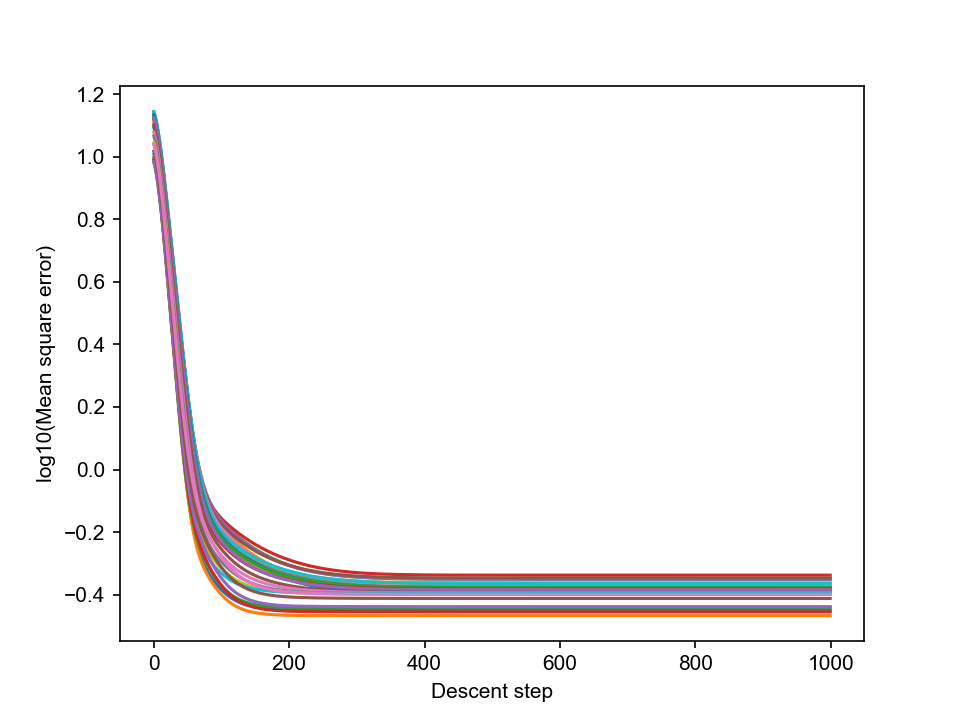

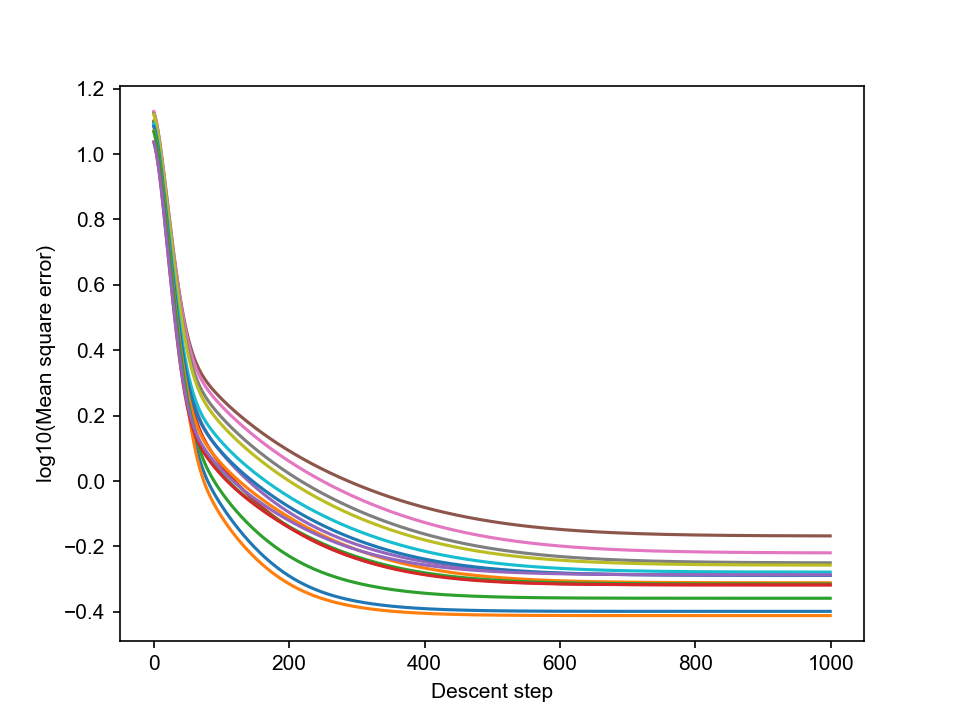

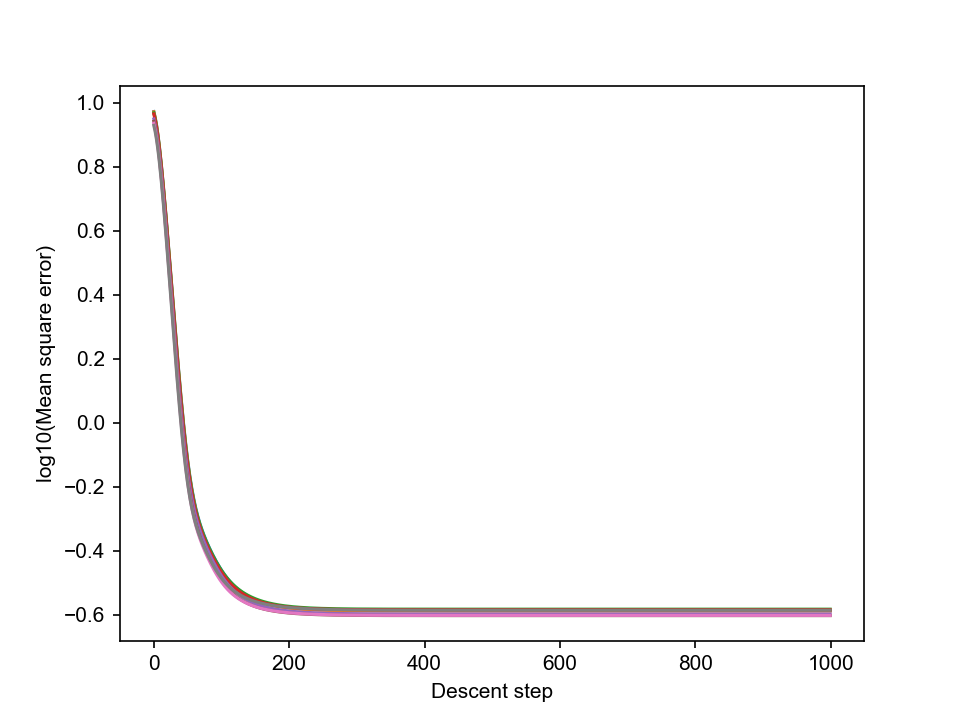

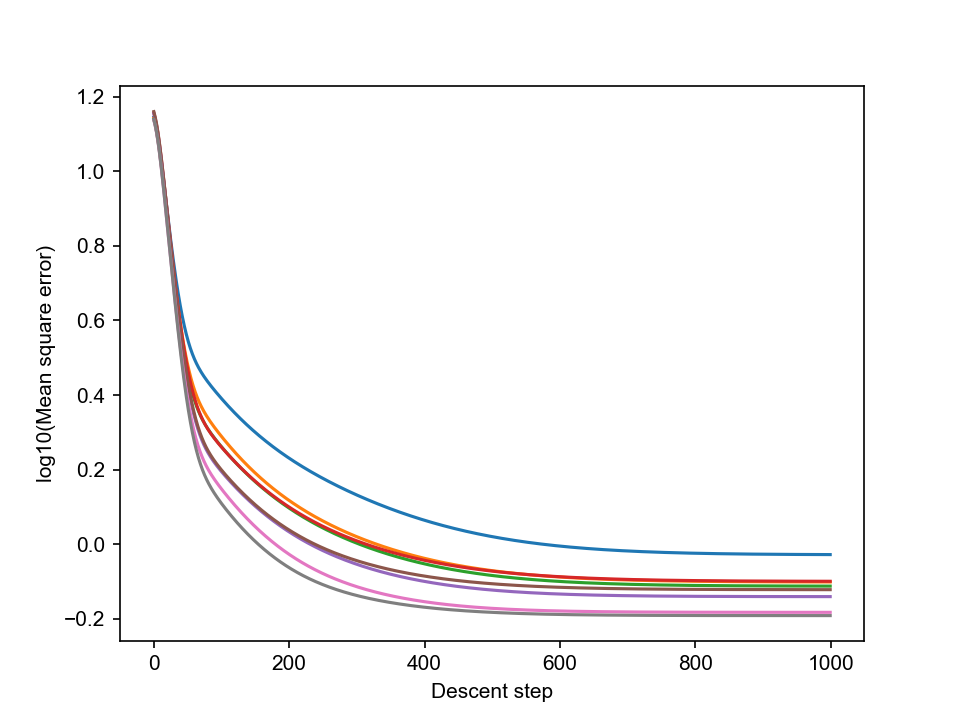

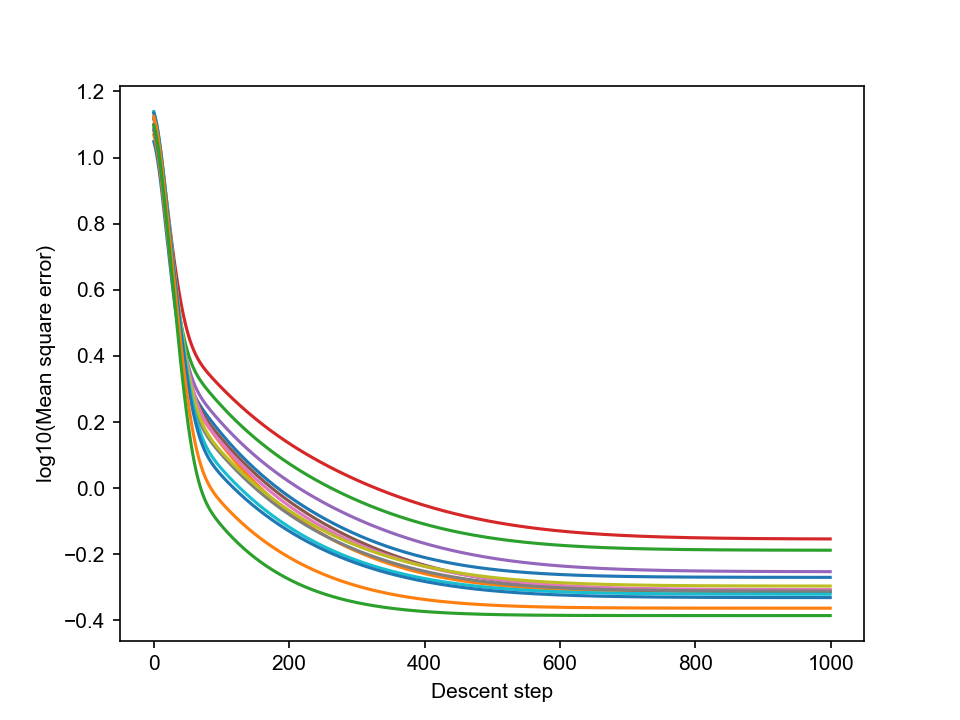

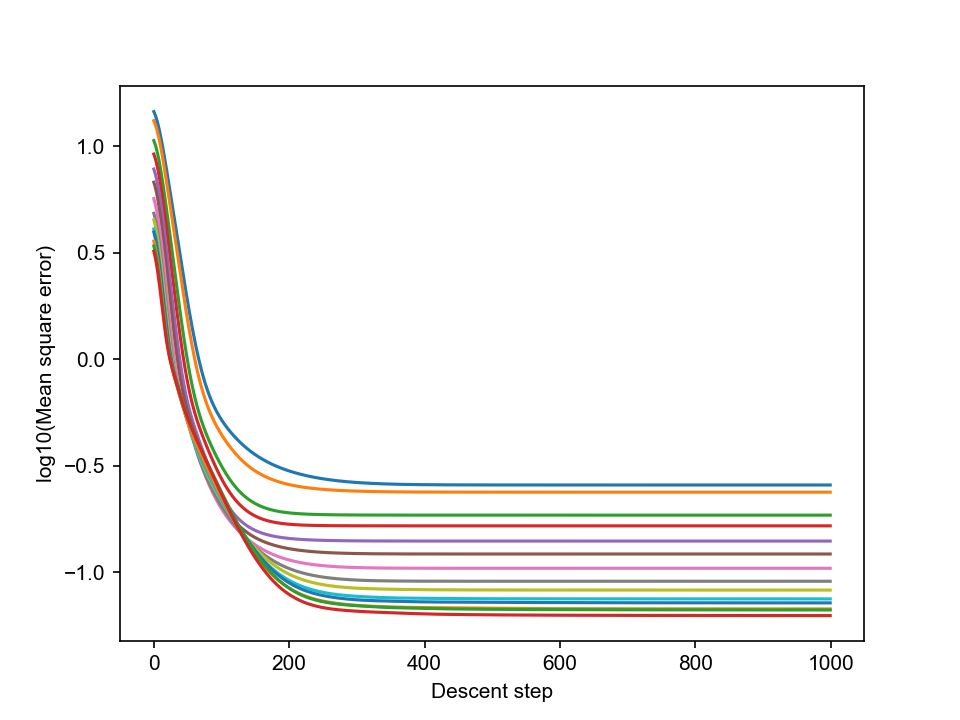

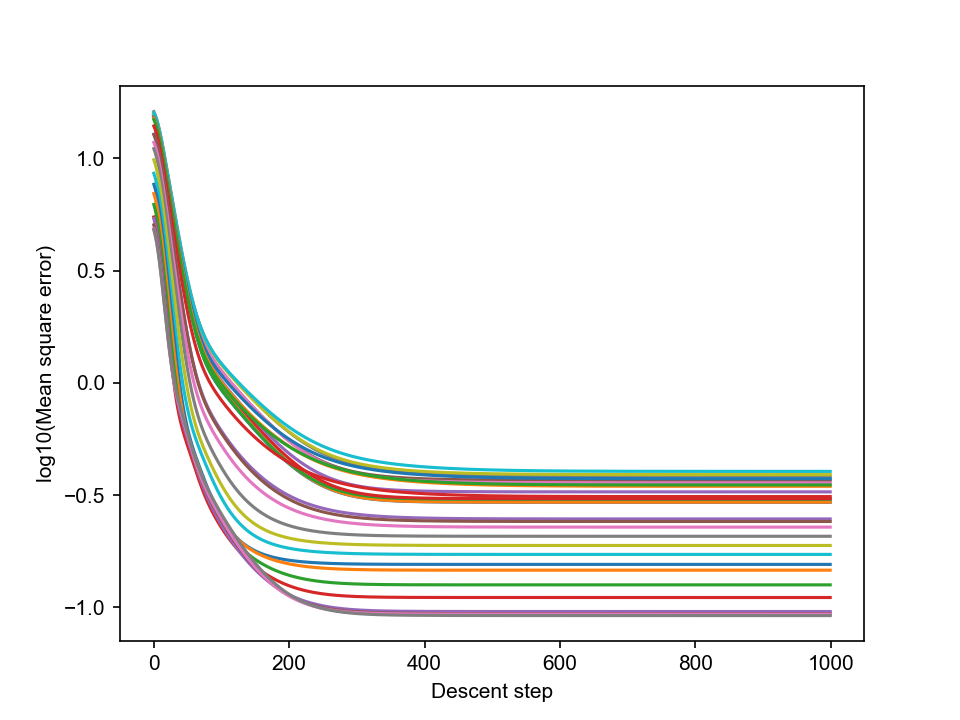

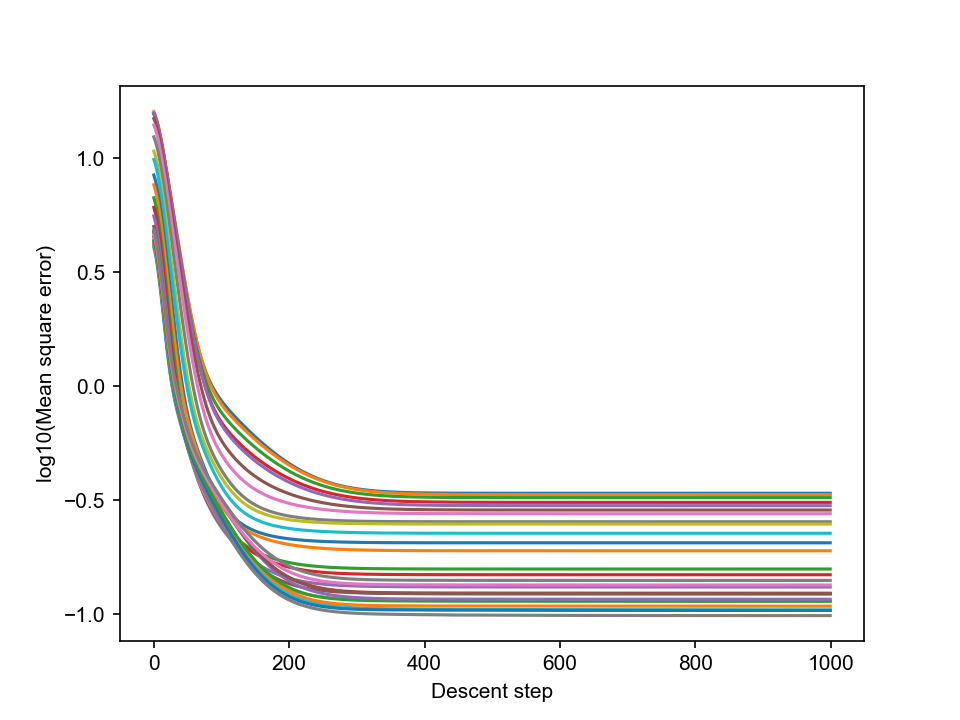

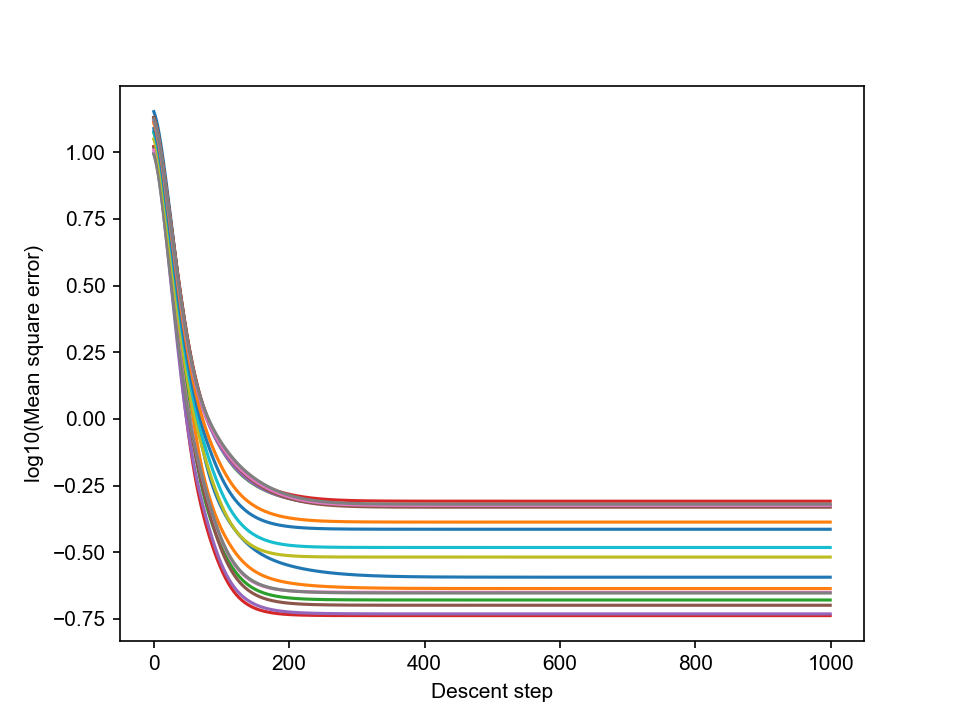

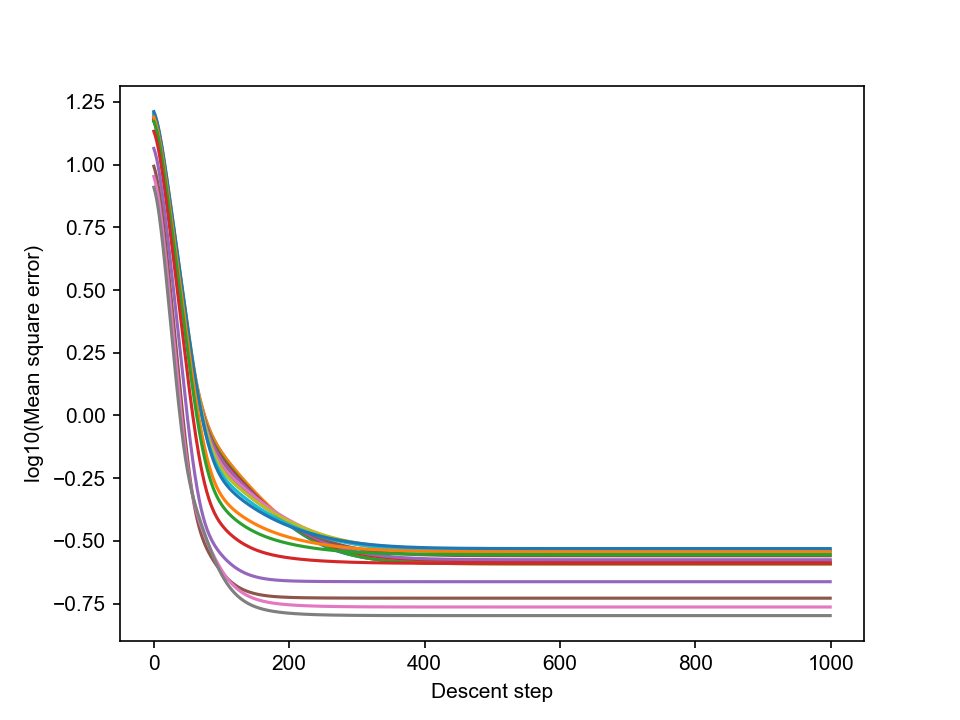

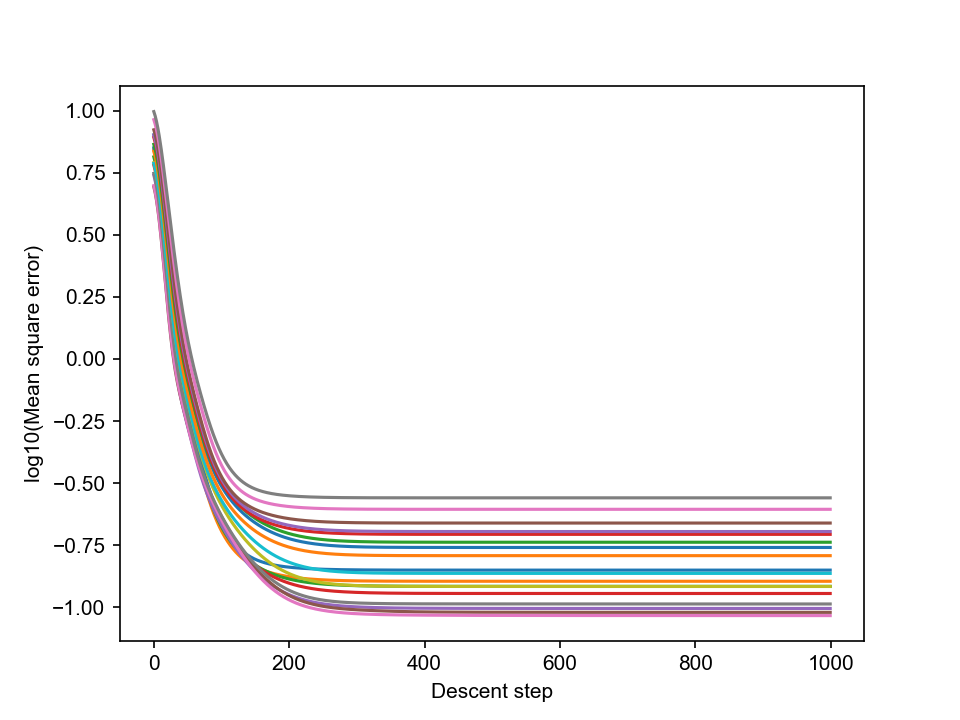

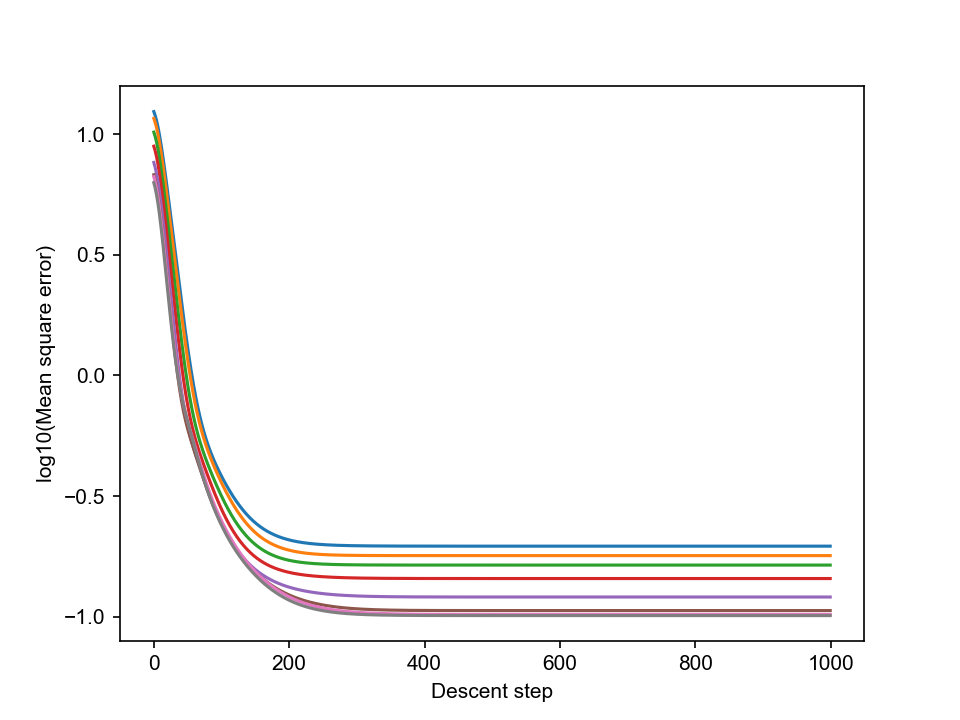

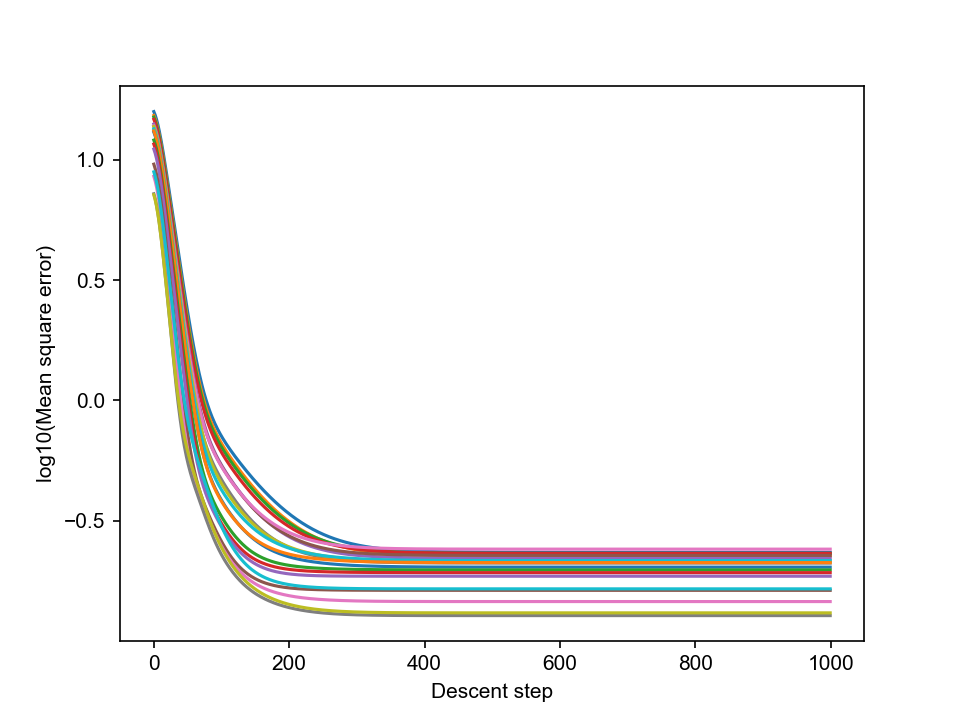

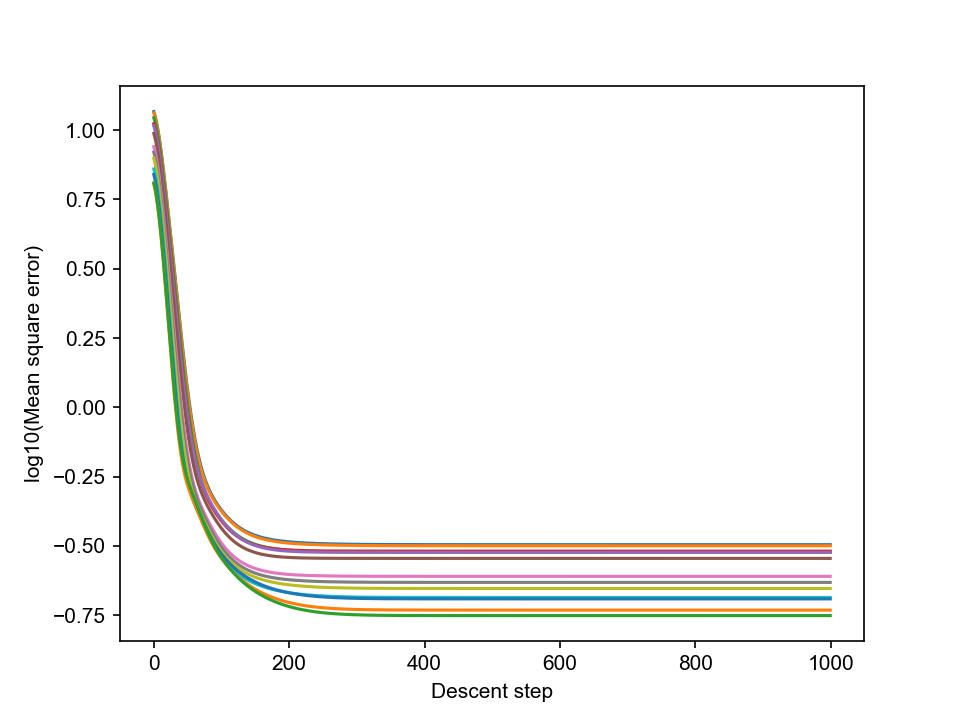

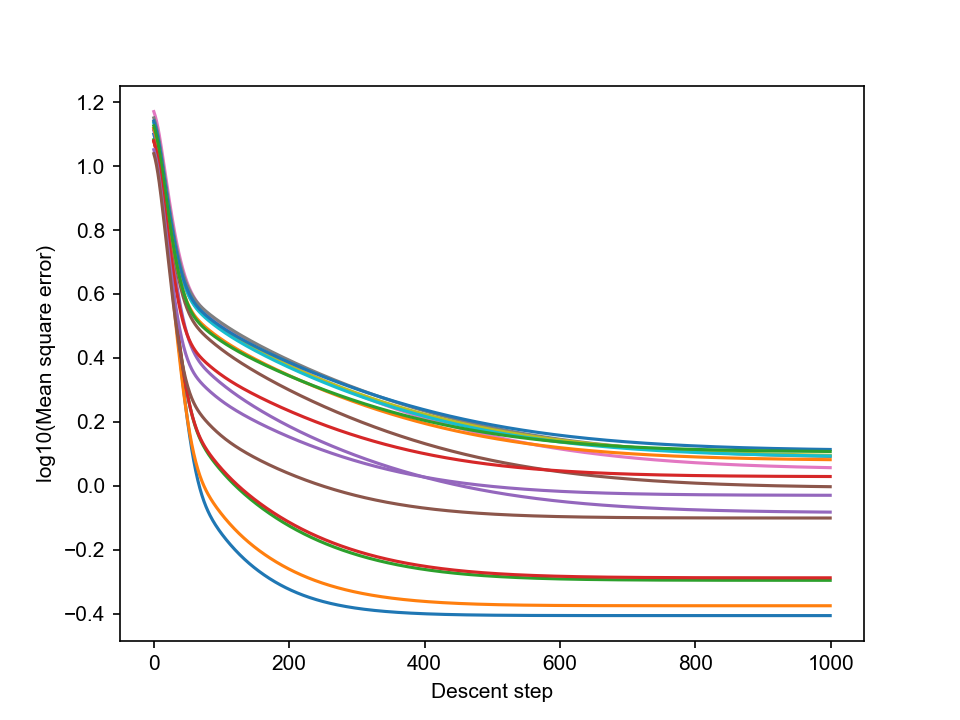

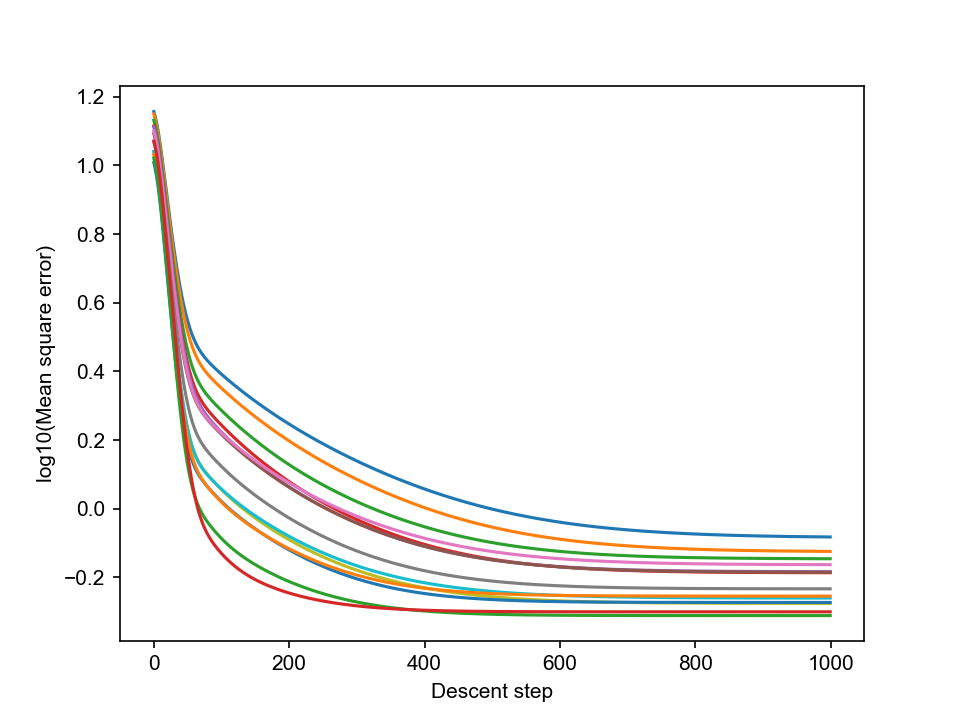

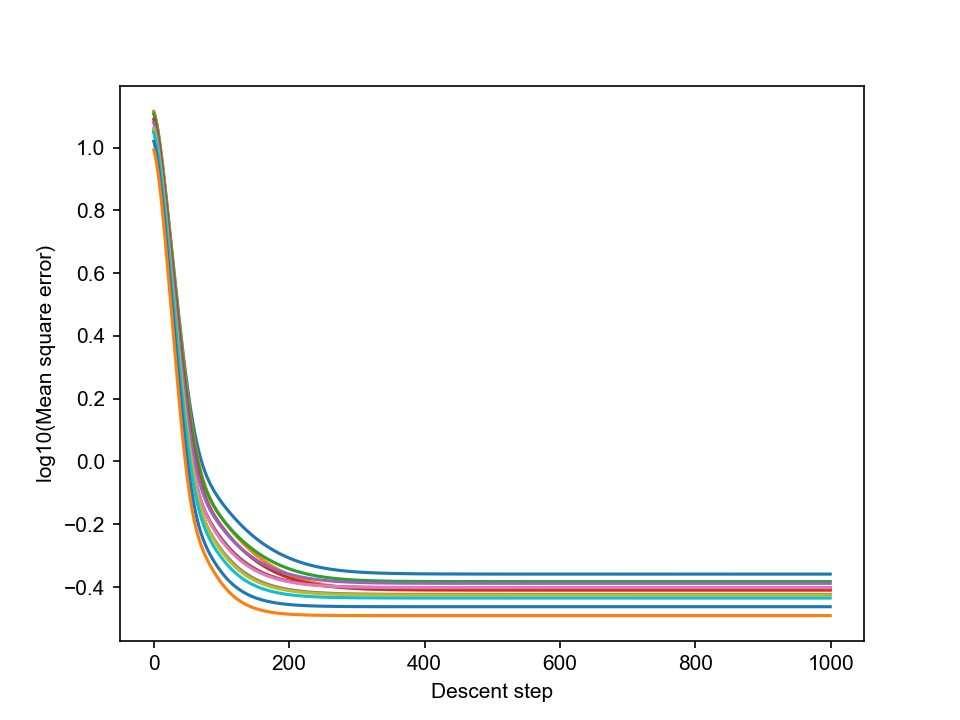

In [6]:
df = pd.read_csv("../../data/mlc4_embryos.csv")
df["Path"] = df["Path"].apply(lambda x: raw_data_path + x)
results = []
for index, row in df.iterrows():
    # print(row.Path)
    # print(row.EmbryoID)

    # Import movie
    img = load_image(row.Path + "/af_corrected.tif")
    roi = [np.loadtxt(row.Path + "/ROI_fit_%s.txt" % i) for i in range(img.shape[0])]

    # Run quantification
    iq = ImageQuant2(img=img, roi=roi, cytbg=cytbg, membg=membg)
    iq.quantify(descent_steps=1000)
    iq.plot_losses(log=True)

    # Compile results
    res = iq.compile_res()
    res["EmbryoID"] = row.EmbryoID
    res["Membrane signal"] *= calibration_factor
    res = res.astype({"Frame": int})
    results.append(res)

### Combine dataframes

In [7]:
results_full = pd.concat(results)
results_full.to_csv("../../data/mlc4_quantification.csv", index=False)

### Filter out polar body

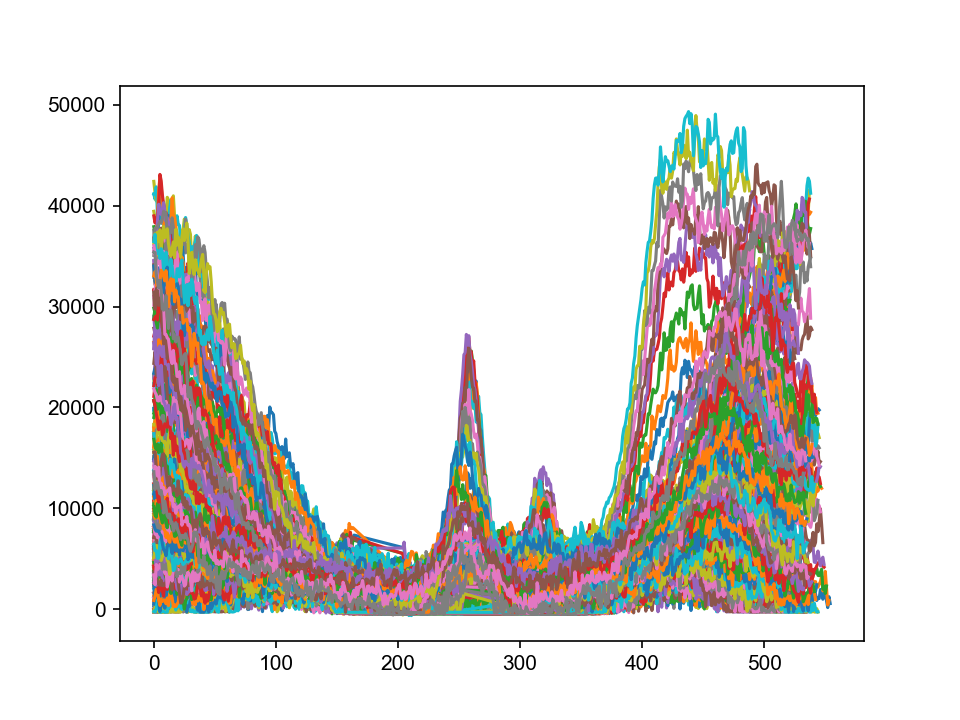

In [8]:
def nan_helper(y):
    return np.isnan(y), lambda z: z.nonzero()[0]


fig, ax = plt.subplots()
results_full = pd.read_csv("../../data/mlc4_quantification.csv")
res_grouped = results_full.groupby(["EmbryoID", "Frame"])
for i, (g, r) in enumerate(res_grouped):
    path = df[df.EmbryoID == g[0]]["Path"].values[0]
    roi = np.loadtxt(path + "/ROI_fit_%s.txt" % g[1])
    _mems = r["Membrane signal"]
    mems = _mems.to_numpy()
    if os.path.exists(path + "/polar_body.txt"):
        polar_body = np.loadtxt(path + "/polar_body.txt")
        ind = int(
            mems.shape[0]
            * np.argmin(np.linalg.norm(roi - polar_body, axis=1))
            / roi.shape[0]
        )
        mems[ind - 20 : ind + 20] = np.nan
        nans, x = nan_helper(mems)
        mems[nans] = np.interp(x(nans), x(~nans), mems[~nans])
    ax.plot(mems)
    results_full.loc[_mems.index, "Membrane signal"] = mems
results_full.to_csv("../../data/mlc4_quantification_no_pb.csv", index=False)